In [81]:
import pickle
from tqdm import tqdm_notebook as tqdm
import pandas
import numpy
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [2]:
import os

In [3]:
entry_categories=dict()

In [4]:
for filename in tqdm(os.listdir('./data/dump')):
    if filename.startswith('metadata_'):
        data=pickle.load(open('./data/dump/%s'%filename,'rb'))
        for entry,meta_data in data.items():
            if meta_data['categories']==[]:
                continue
            entry_categories[entry]=meta_data['categories']

In [5]:
visit_count_df=pickle.load(open('./data/dump/merged_metadata.pkl','rb'))

In [6]:
visit_count_df['Title']=visit_count_df.index

In [7]:
visit_count_df.head()

category_num  frequency  image_num  \
$1                                              4.0     7791.0        1.0   
$10,000_unsecured_visa_or_mastercards           0.0      980.0        0.0   
'O_Sole_Mio                                     0.0      897.0        0.0   
(Don't_Fear)_The_Reaper                        14.0      970.0        9.0   
(I_Can't_Get_No)_Satisfaction                  49.0      667.0       11.0   

                                       language_num  link_num  update  \
$1                                              1.0      45.0     0.0   
$10,000_unsecured_visa_or_mastercards           0.0       0.0     0.0   
'O_Sole_Mio                                     0.0       1.0     0.0   
(Don't_Fear)_The_Reaper                         9.0     443.0    17.0   
(I_Can't_Get_No)_Satisfaction                  31.0     590.0    10.0   

                                       vandalism  in_degree  out_degree  \
$1                                           0.0        0.0        11.0   
$10,000_unsecured_visa_or_mastercards        0.0        0.0         0.0   
'O_Sole_Mio                                  0.0        7.0         0.0   
(Don't_Fear)_The_Reaper                      0.0       40.0       170.0   
(I_Can't_Get_No)_Satisfaction                0.0       71.0       228.0   

                                       page_len  \
$1                                       2476.0   
$10,000_unsecured_visa_or_mastercards       0.0   
'O_Sole_Mio                                25.0   
(Don't_Fear)_The_Reaper                 26292.0   
(I_Can't_Get_No)_Satisfaction           37360.0   

                                                                       Title  
$1                                                                        $1  
$10,000_unsecured_visa_or_mastercards  $10,000_unsecured_visa_or_mastercards  
'O_Sole_Mio                                                      'O_Sole_Mio  
(Don't_Fear)_The_Reaper                              (Don't_Fear)_The_Reaper  
(I_Can't_Get_No)_Satisfaction                  (I_Can't_Get_No)_Satisfaction

In [8]:
len(visit_count_df)

72087

In [9]:
visit_count_df=visit_count_df[visit_count_df['Title'].isin(entry_categories)]

In [10]:
len(visit_count_df)

63782

In [11]:
visit_count_df.values.shape

(63782, 11)

In [12]:
category_visit_count=dict()
for value in visit_count_df.values:
    for c in entry_categories[value[-1]]:
        if c.startswith('Category:Wikipedia'):
            continue
        value2=numpy.array(list(value[1:-1])+[1])
        try:
            category_visit_count[c]+=value2
        except:
            category_visit_count[c]=value2

In [13]:
data=[]
for category, value in category_visit_count.items():
    data.append([category]+list(value))

In [14]:
["Category"]+list(visit_count_df.columns)[1:-1]+["Title Count"]

['Category',
 'frequency',
 'image_num',
 'language_num',
 'link_num',
 'update',
 'vandalism',
 'in_degree',
 'out_degree',
 'page_len',
 'Title Count']

In [15]:
category_visit_df=pandas.DataFrame(data,columns=["Category"]+list(visit_count_df.columns)[1:-1]+["Title Count"])

In [16]:
for column in list(visit_count_df.columns)[1:-1]:
    category_visit_df['Avg_'+column]=category_visit_df[column]/category_visit_df['Title Count']

In [120]:
def seperate_list(array, bins = 10):
    arrary1 = sorted(array)
    cut = []
    delta = len(arrary1) // bins
    print(delta)
    for j in range(0, bins):
        if len(cut)>0 and arrary1[delta * j]==cut[-1]:
            continue
        cut.append(arrary1[delta * j])
    cut.append(arrary1[-1])
    return cut

In [70]:
category_visit_df.columns

Index(['Category', 'frequency', 'image_num', 'language_num', 'link_num',
       'update', 'vandalism', 'in_degree', 'out_degree', 'page_len',
       'Title Count', 'Avg_frequency', 'Avg_image_num', 'Avg_language_num',
       'Avg_link_num', 'Avg_update', 'Avg_vandalism', 'Avg_in_degree',
       'Avg_out_degree', 'Avg_page_len', 'avg_frequency_bin'],
      dtype='object')

In [91]:
visit_count_df['frequency']=visit_count_df['frequency'].astype(int)

In [129]:
visit_count_df['in_degree']=visit_count_df['in_degree'].astype(int)
visit_count_df['out_degree']=visit_count_df['out_degree'].astype(int)

In [84]:
category_visit_df['Avg_frequency']=category_visit_df['Avg_frequency'].astype(int)

In [86]:
category_visit_df['avg_frequency_bin'] = pandas.cut(category_visit_df['Avg_frequency'], seperate_list(category_visit_df['Avg_frequency'].values,20))

7758


In [87]:
category_visit_df.head()

Category  frequency  image_num  \
0                          Category:Video signal    37717.0       48.0   
1  Category:Swimmers at the 1968 Summer Olympics     1115.0       38.0   
2                      Category:Bosporan Kingdom     1178.0       10.0   
3                           Category:1948 births   238778.0      854.0   
4                            Category:1991 songs    12232.0       53.0   

   language_num  link_num  update  vandalism  in_degree  out_degree  \
0         224.0    1542.0   101.0        1.0      676.0       566.0   
1          53.0     907.0     8.0        0.0       72.0       103.0   
2          61.0     398.0     9.0        0.0       73.0       116.0   
3        3243.0   37322.0  2505.0       17.0     9066.0     12012.0   
4         137.0    2533.0   117.0        2.0      254.0       680.0   

    page_len        ...          Avg_frequency  Avg_image_num  \
0   242978.0        ...                   4714       6.000000   
1    51511.0        ...                   1115      38.000000   
2    42025.0        ...                   1178      10.000000   
3  4862911.0        ...                   1836       6.569231   
4   251507.0        ...                   1112       4.818182   

   Avg_language_num  Avg_link_num  Avg_update  Avg_vandalism  Avg_in_degree  \
0         28.000000    192.750000   12.625000       0.125000      84.500000   
1         53.000000    907.000000    8.000000       0.000000      72.000000   
2         61.000000    398.000000    9.000000       0.000000      73.000000   
3         24.946154    287.092308   19.269231       0.130769      69.738462   
4         12.454545    230.272727   10.636364       0.181818      23.090909   

   Avg_out_degree  Avg_page_len  avg_frequency_bin  
0       70.750000  30372.250000       (4487, 6426]  
1      103.000000  51511.000000       (1034, 1138]  
2      116.000000  42025.000000       (1138, 1249]  
3       92.400000  37407.007692       (1668, 1853]  
4       61.818182  22864.272727       (1034, 1138]  

[5 rows x 21 columns]

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas
import re
import os

In [89]:
len(category_visit_df)

155177

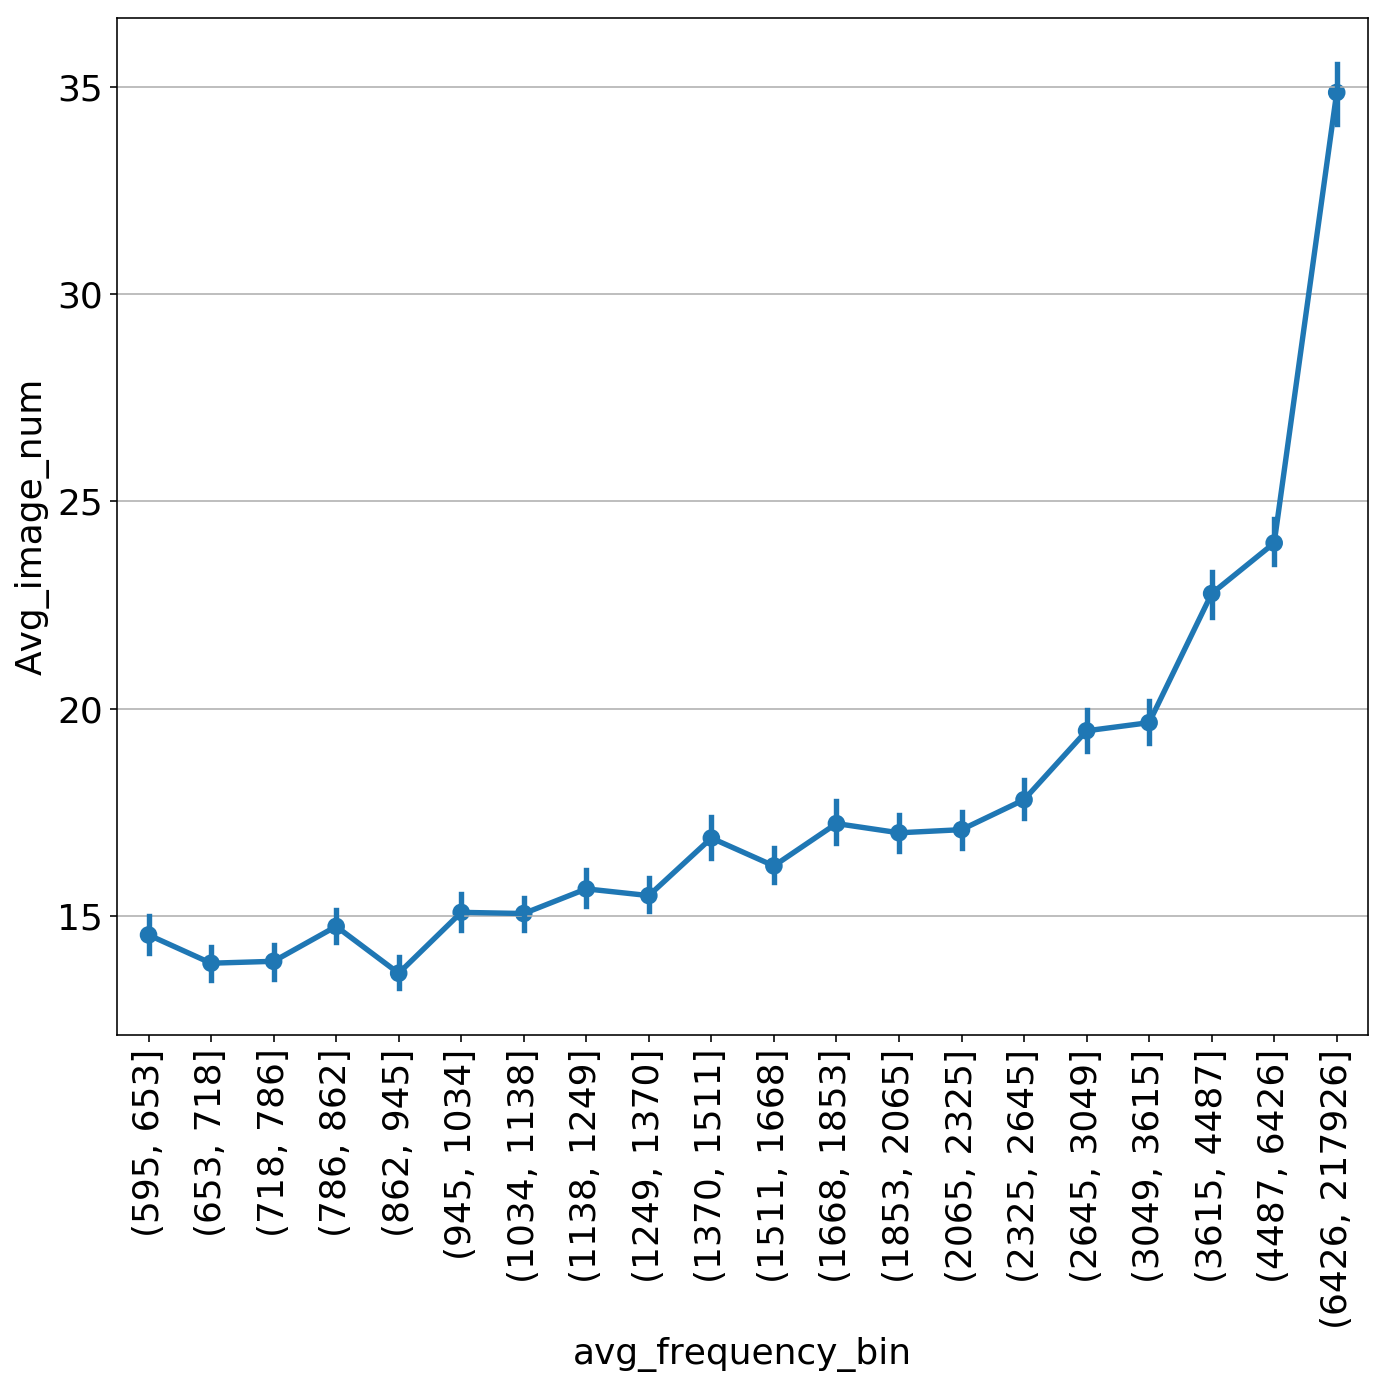

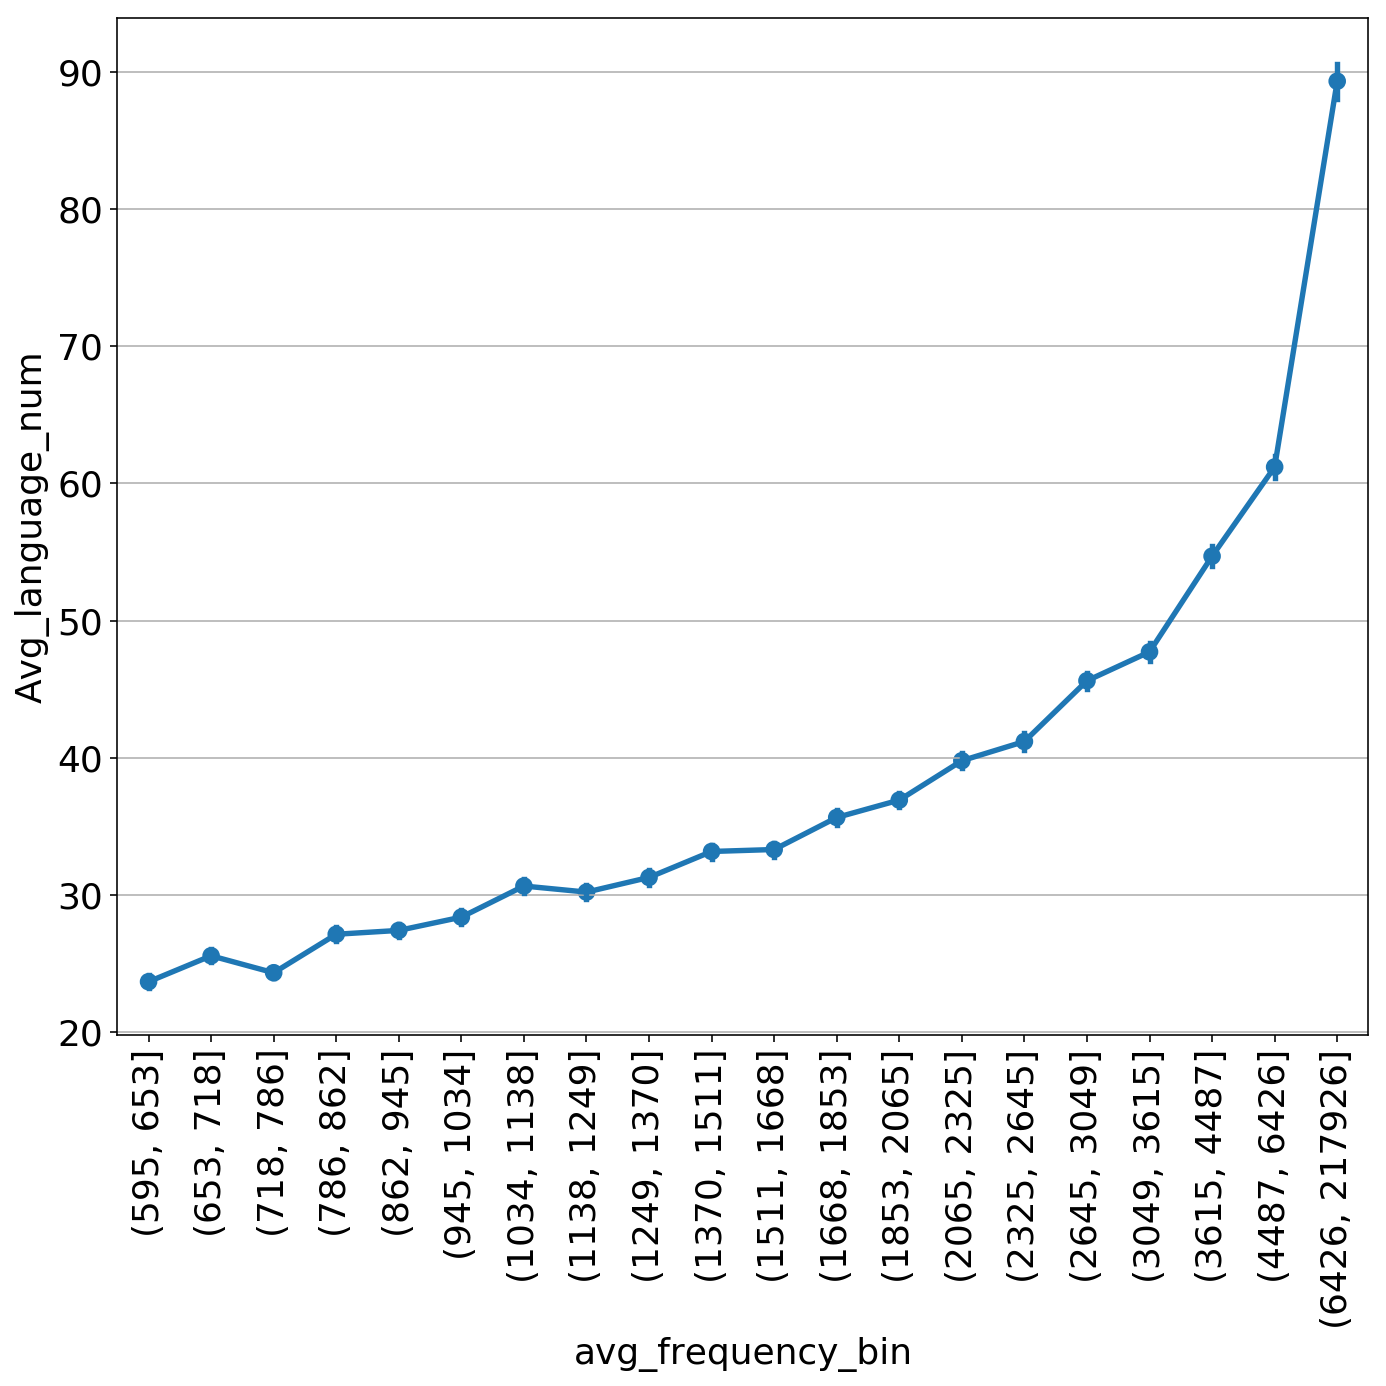

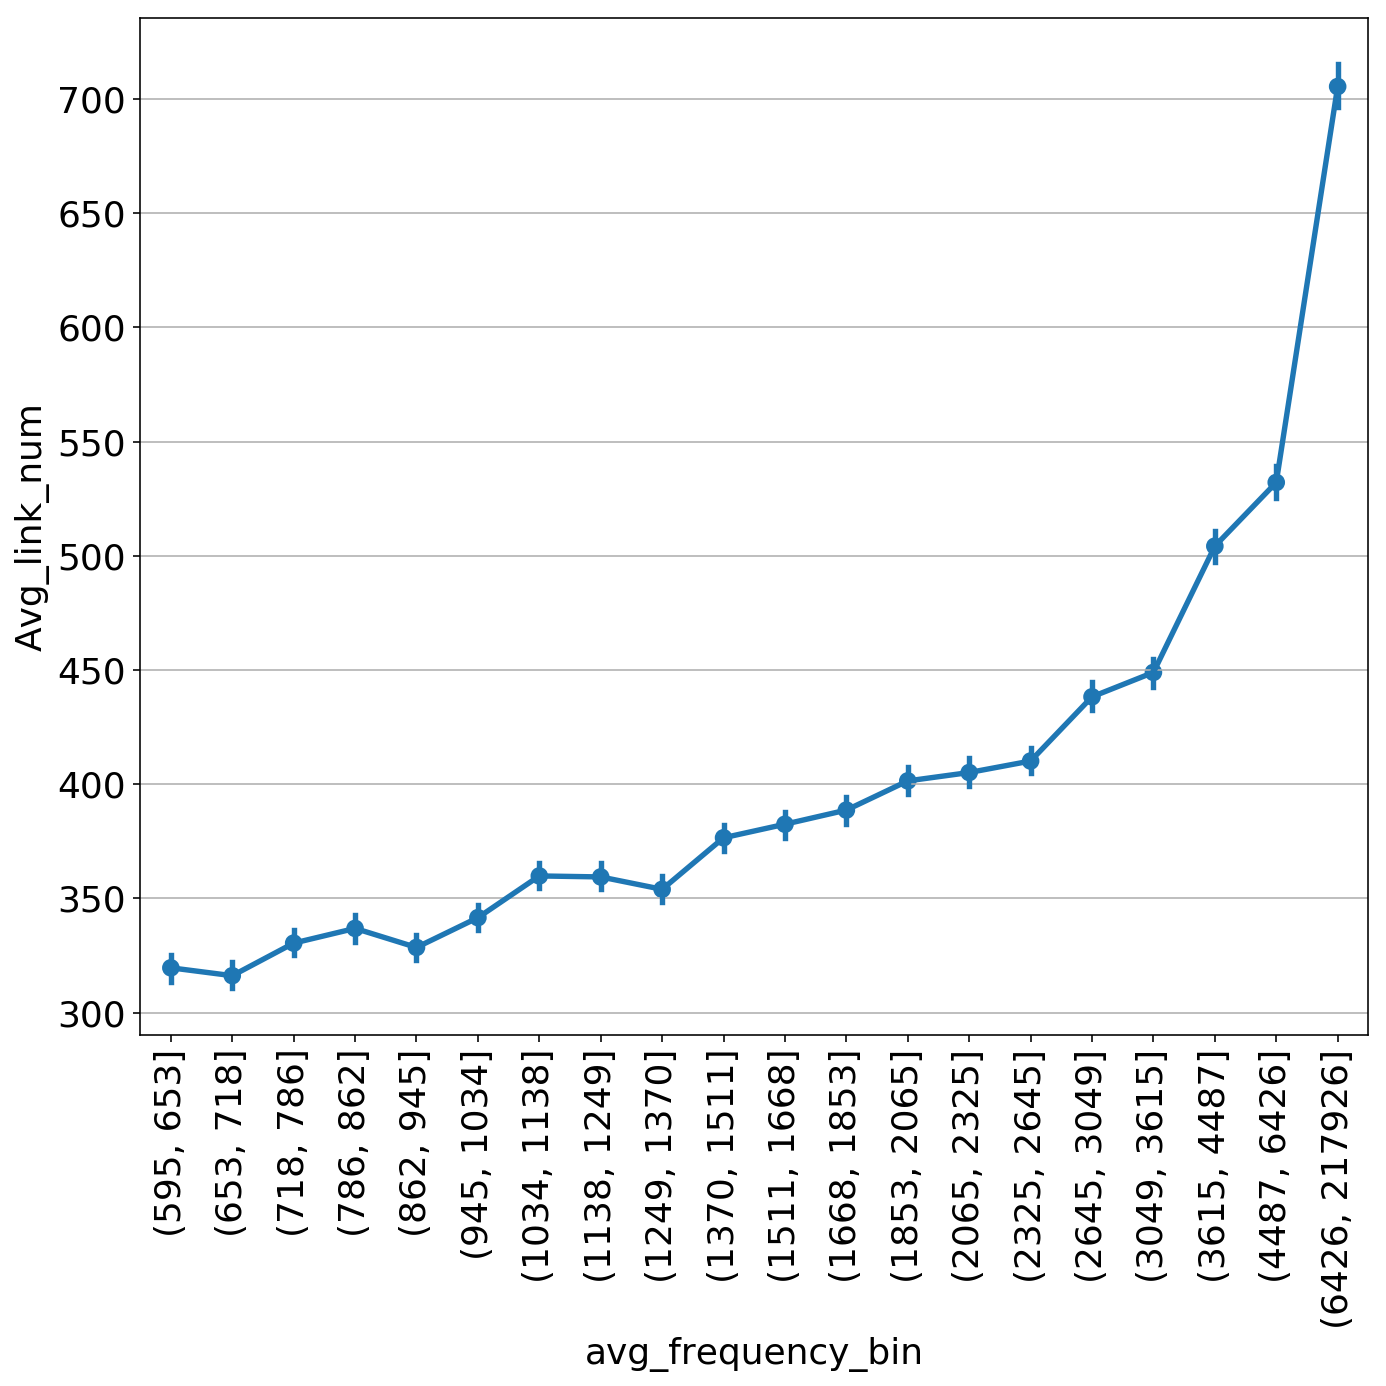

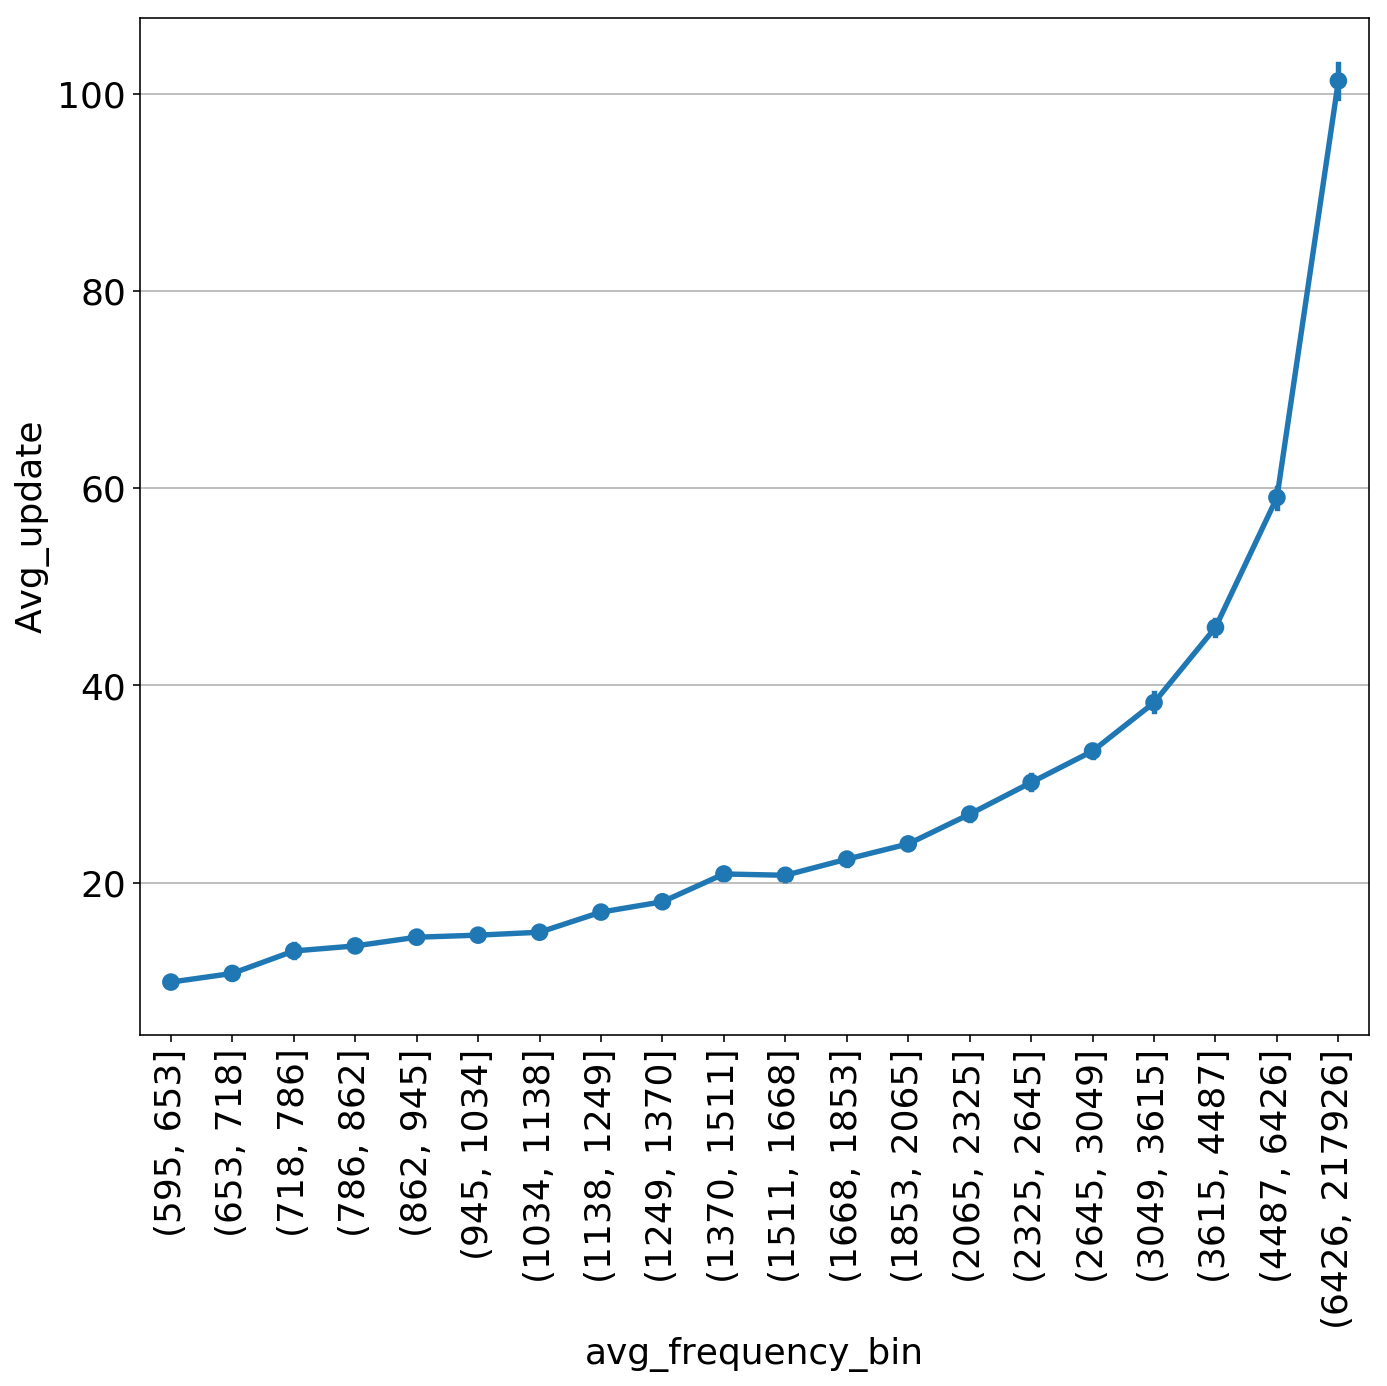

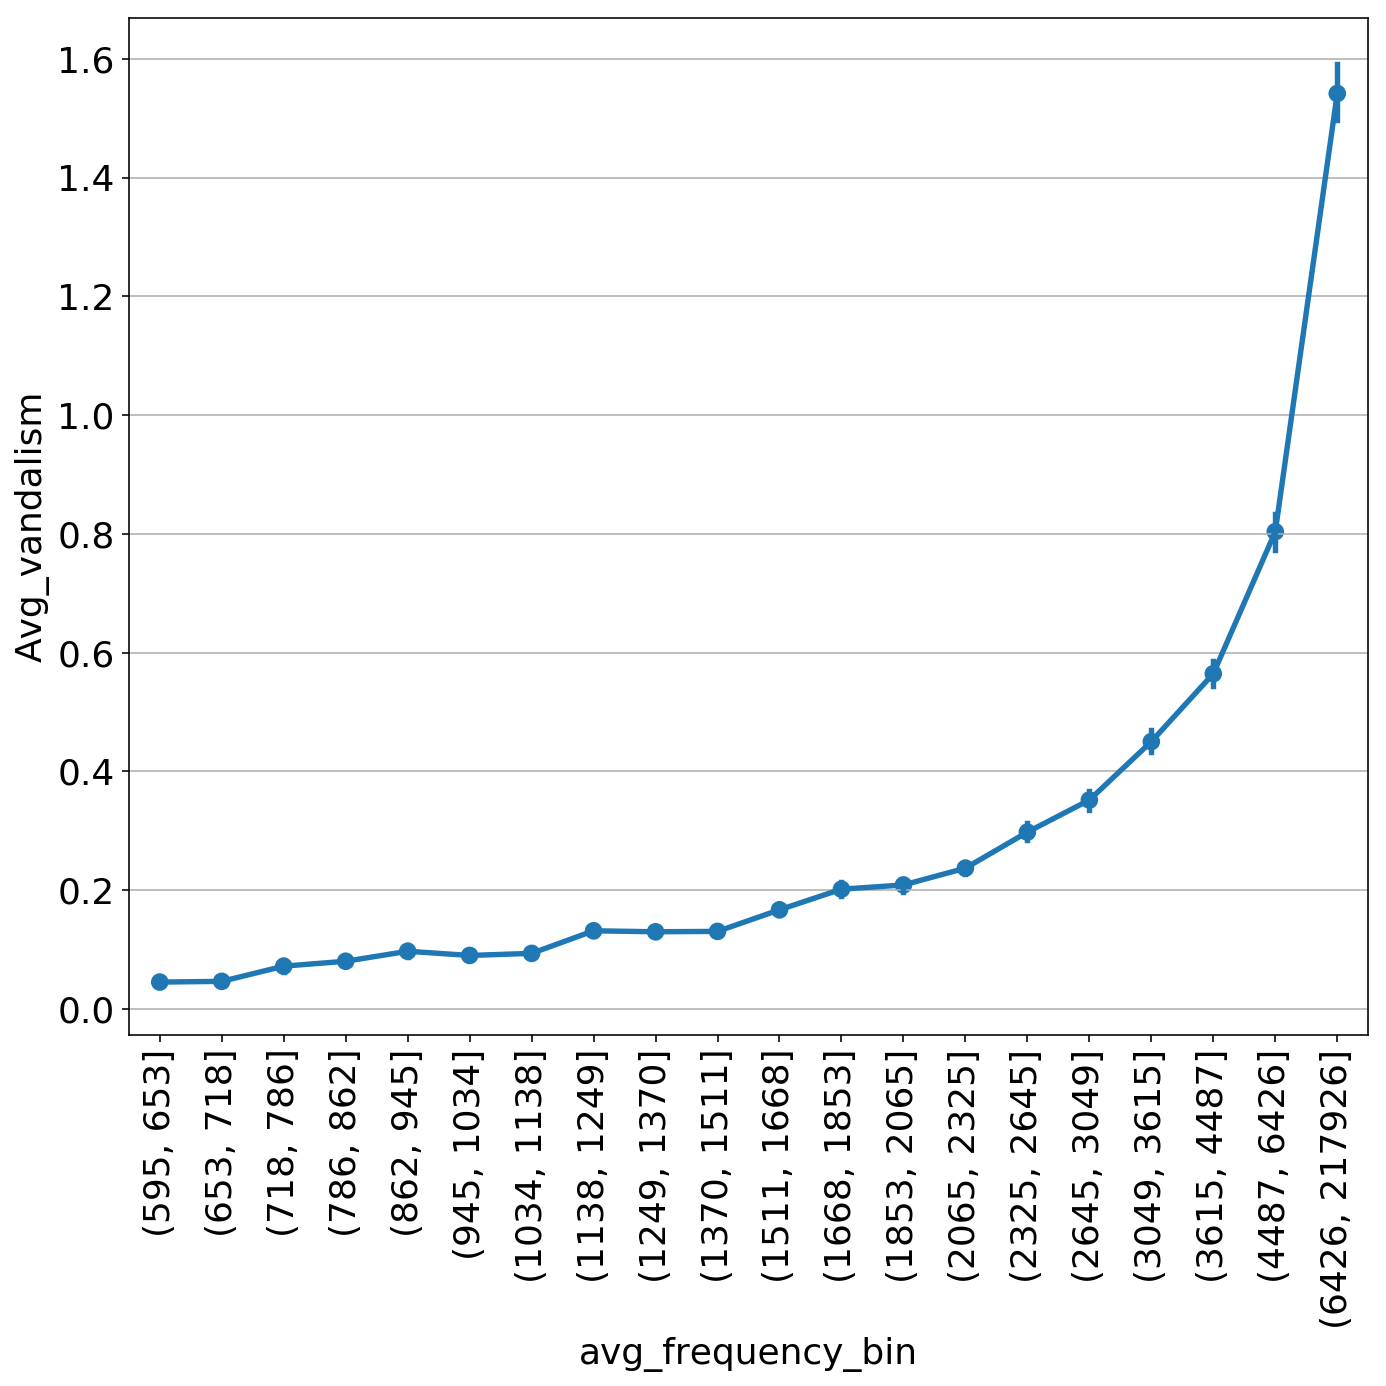

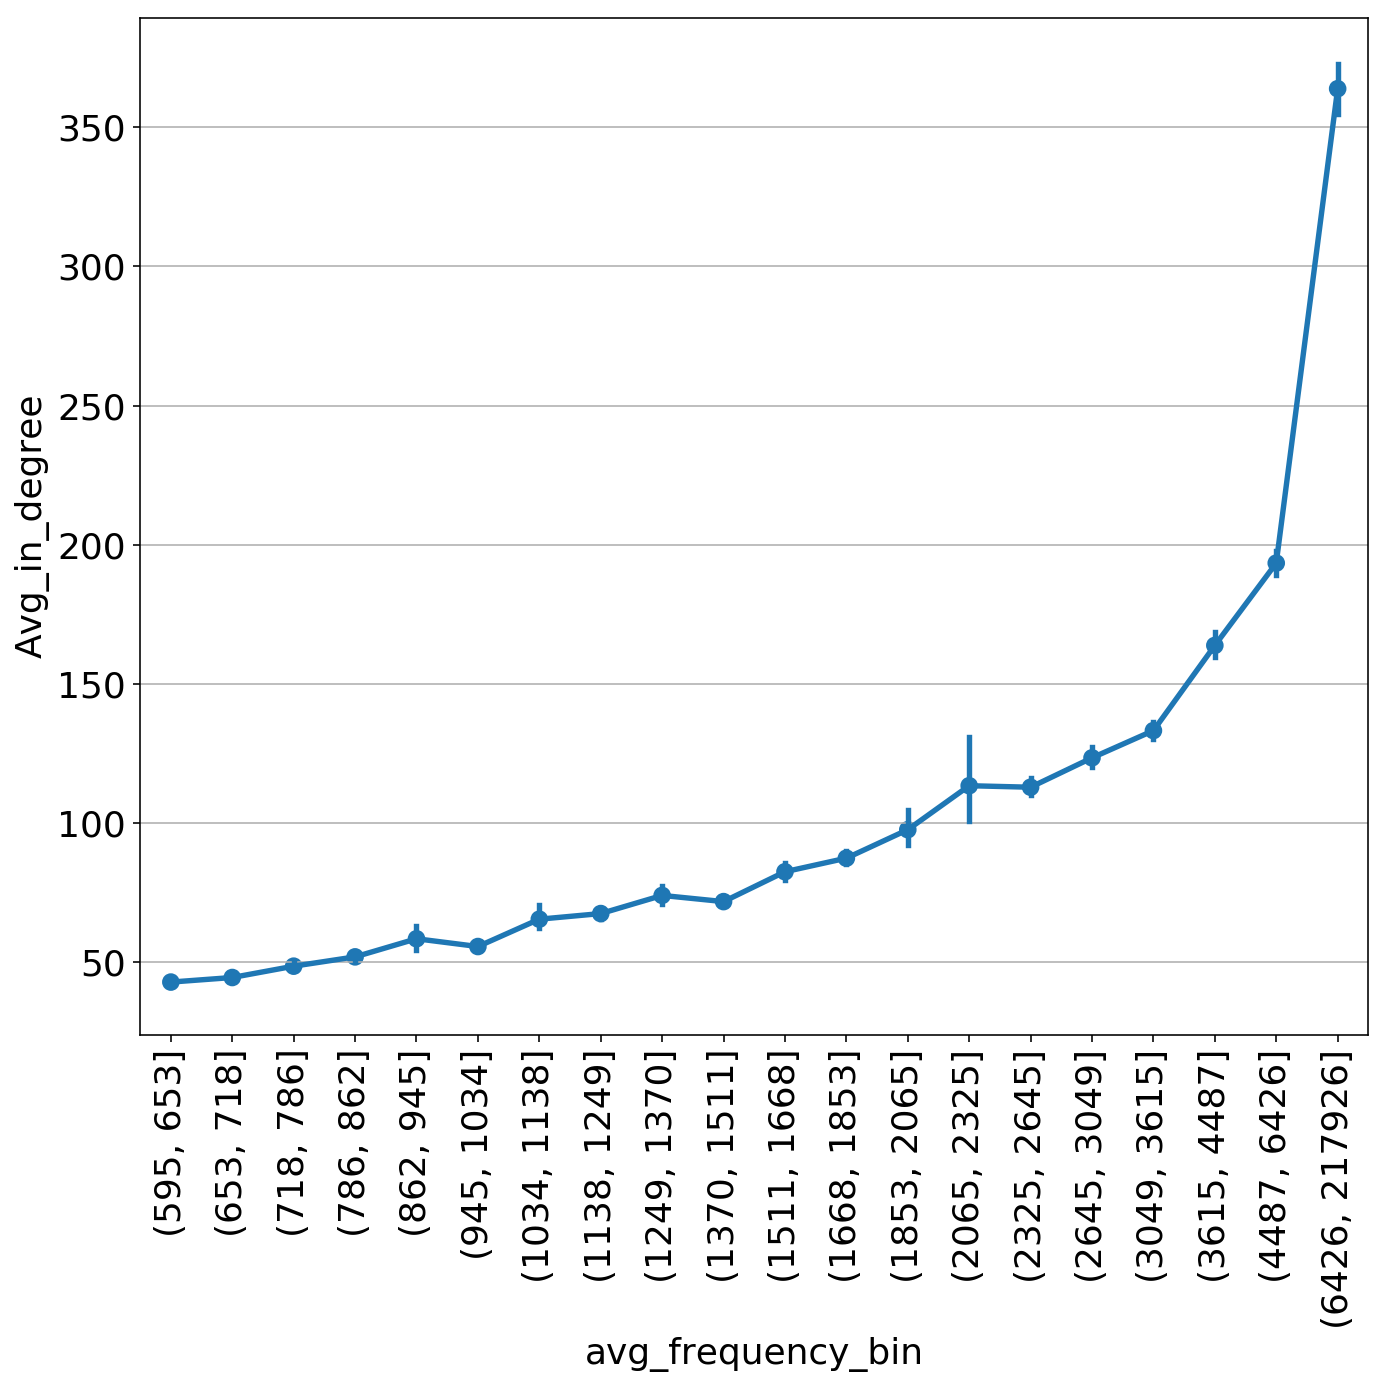

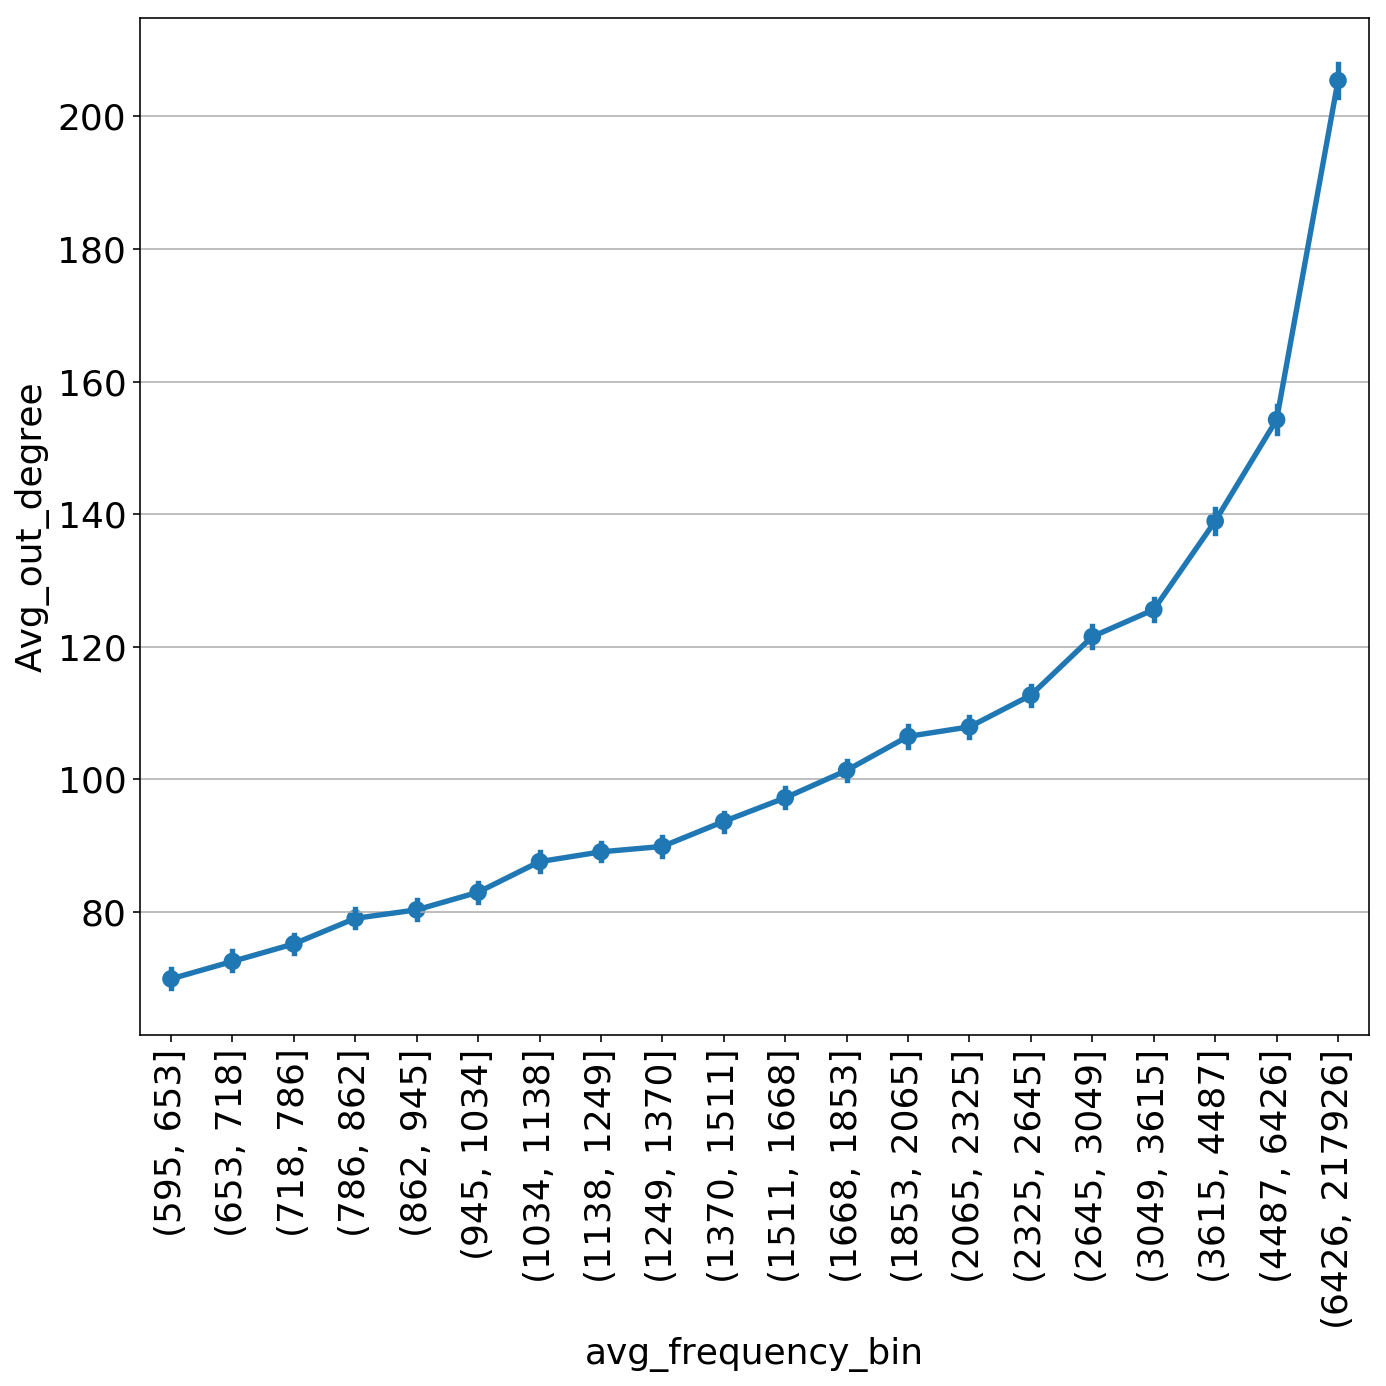

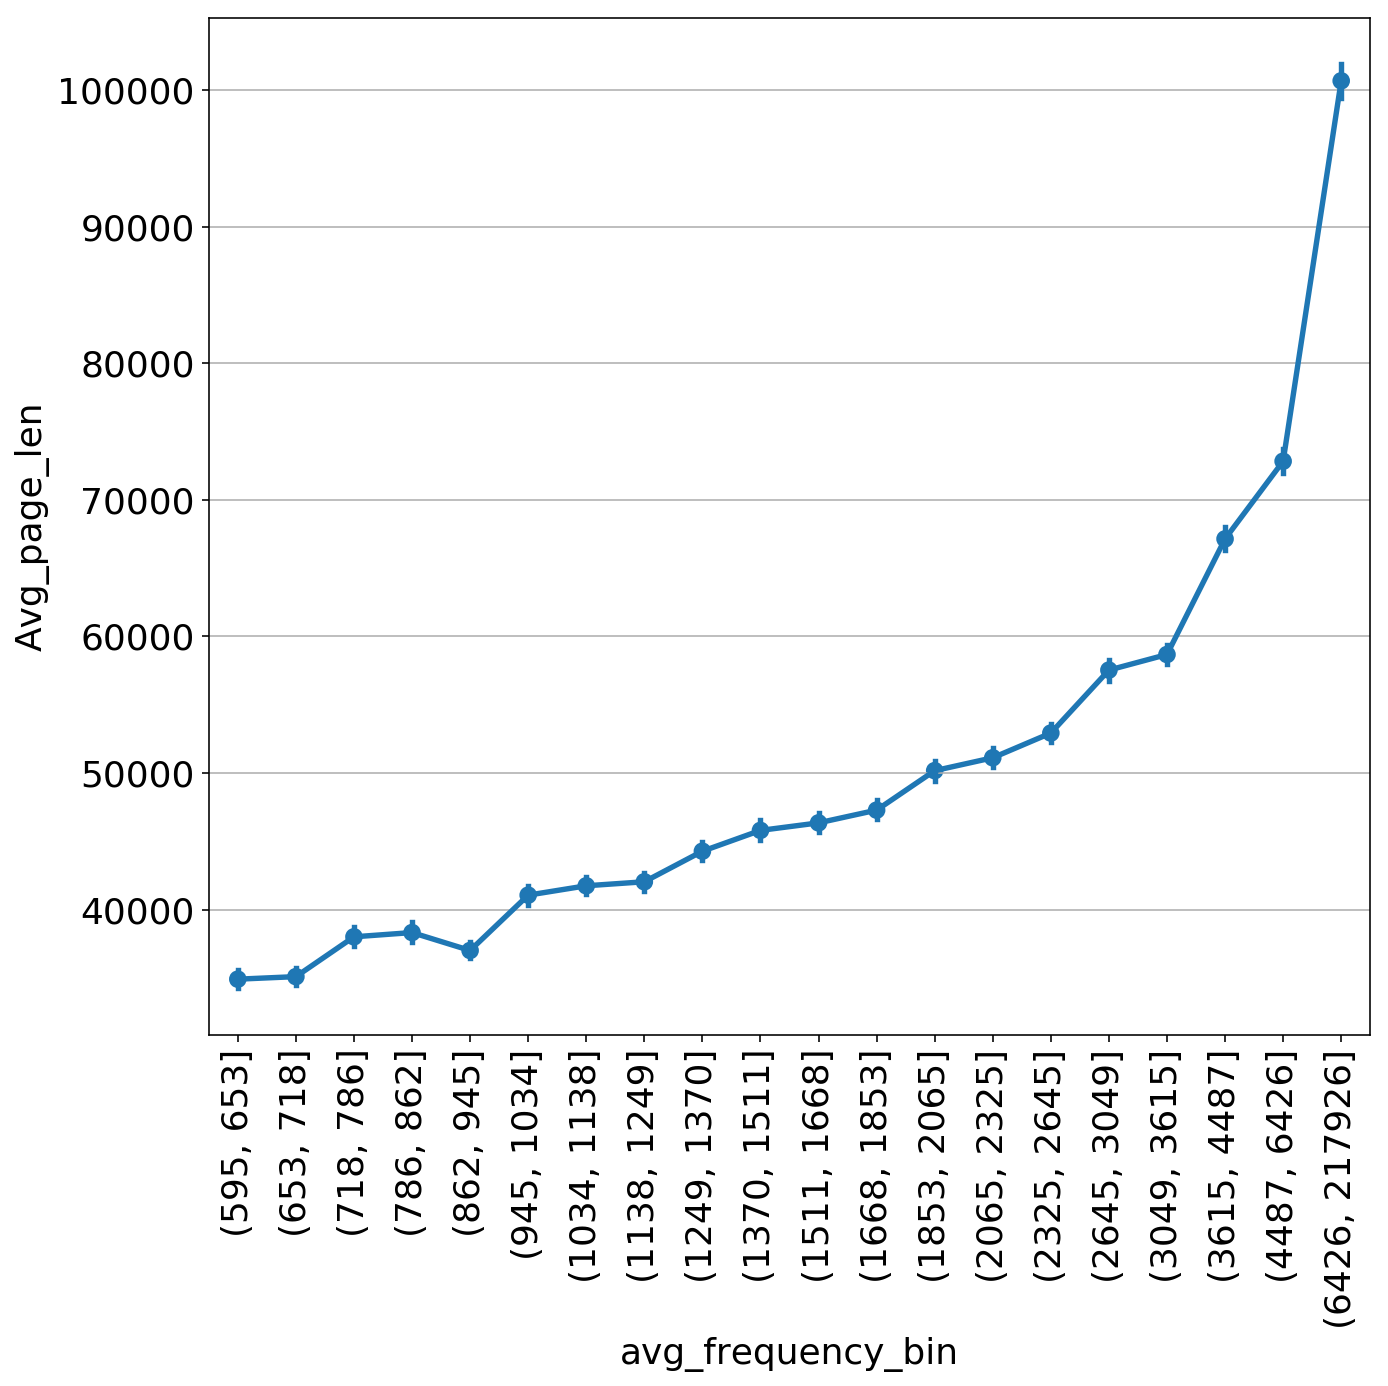

ValueError: Could not interpret input 'Avg_Title'

<Figure size 720x720 with 0 Axes>

In [135]:
for column in list(visit_count_df.columns)[2:-3]:
    plt.figure(figsize=(10,10))
    sns.pointplot(x='avg_frequency_bin', y='Avg_'+column,data=category_visit_df)
    plt.xticks(rotation='vertical')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./plots/category_frequency_%s.png'%column,dpi=400)
    plt.show()

In [130]:
visit_count_df['frequency_bin'] = pandas.cut(visit_count_df['frequency'], seperate_list(visit_count_df['frequency'].values,20))

3189


In [131]:
visit_count_df.columns

Index(['category_num', 'frequency', 'image_num', 'language_num', 'link_num',
       'update', 'vandalism', 'in_degree', 'out_degree', 'page_len', 'Title',
       'frequency_bin', 'out_degree_bin'],
      dtype='object')

In [132]:
seperate_list(visit_count_df['out_degree'].values,2)

31891


[0, 53, 1610]

In [133]:
visit_count_df['out_degree_bin'] = pandas.cut(visit_count_df['out_degree'], seperate_list(visit_count_df['out_degree'].values,20))

3189


In [141]:
visit_count_df['in_degree_bin'] = pandas.cut(visit_count_df['in_degree'], seperate_list(visit_count_df['in_degree'].values,20))

3189


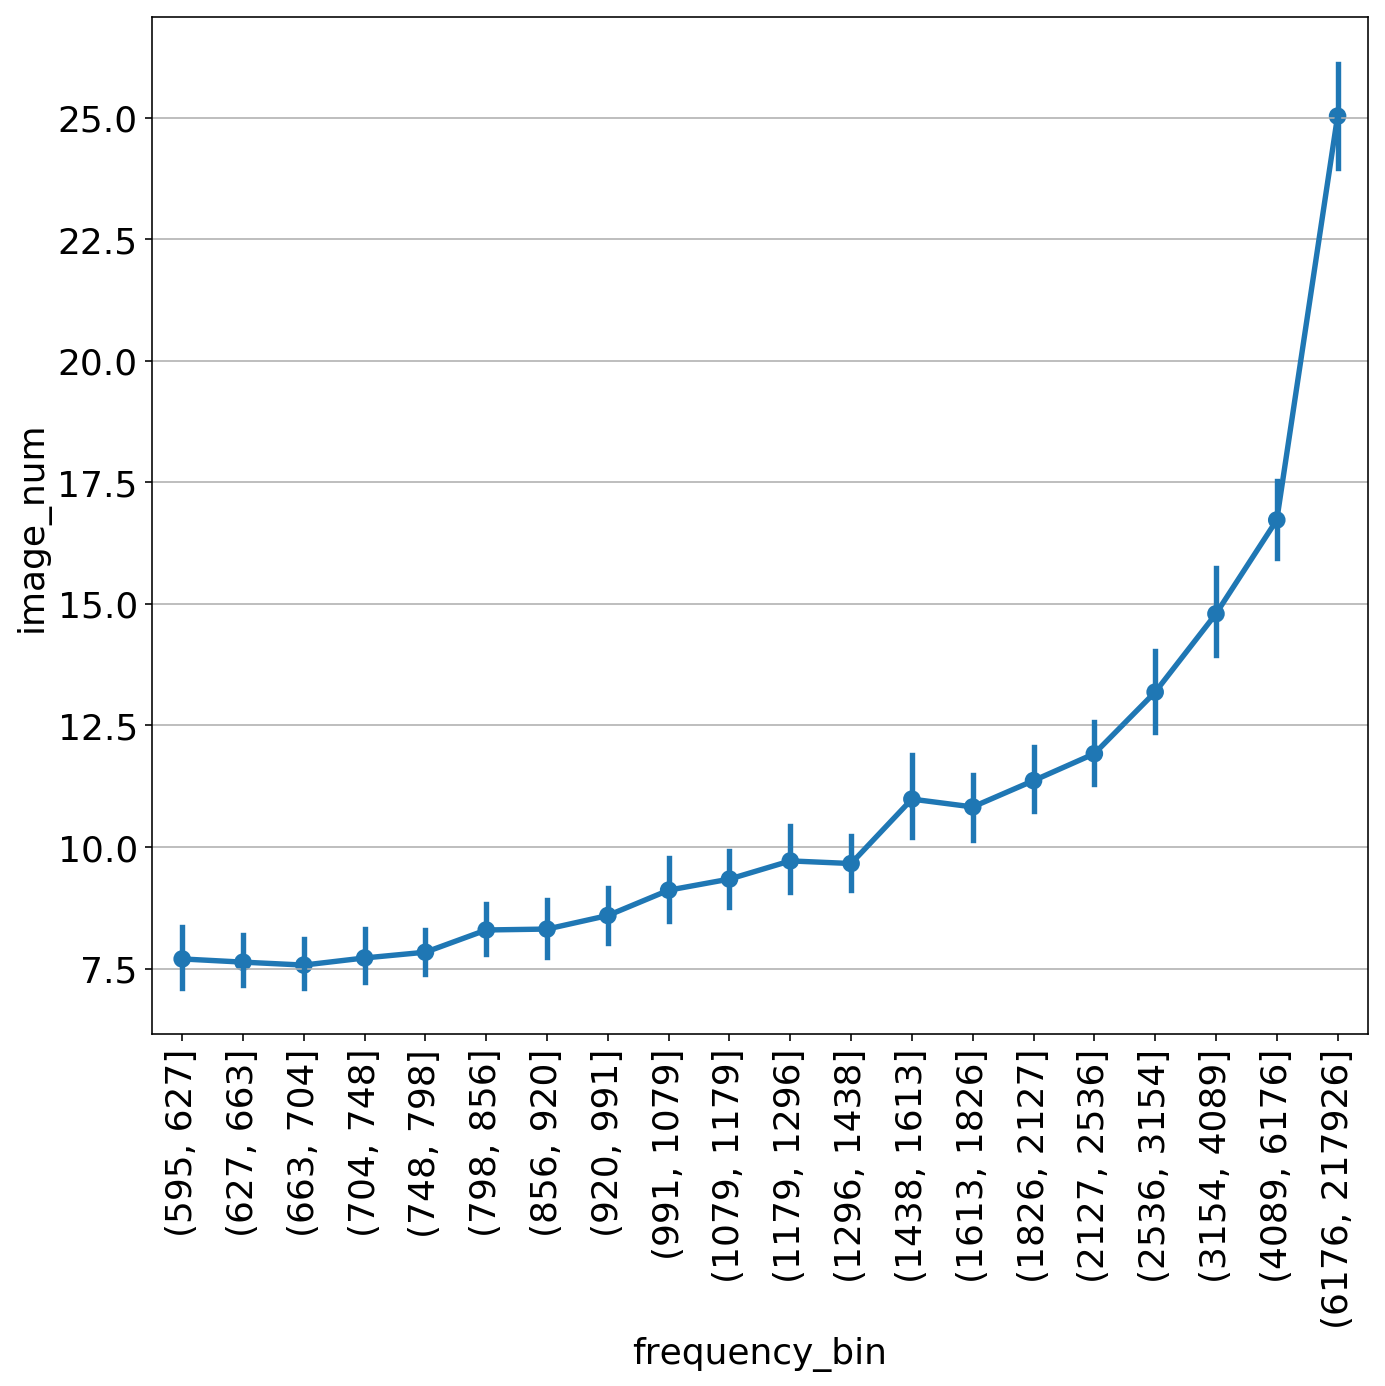

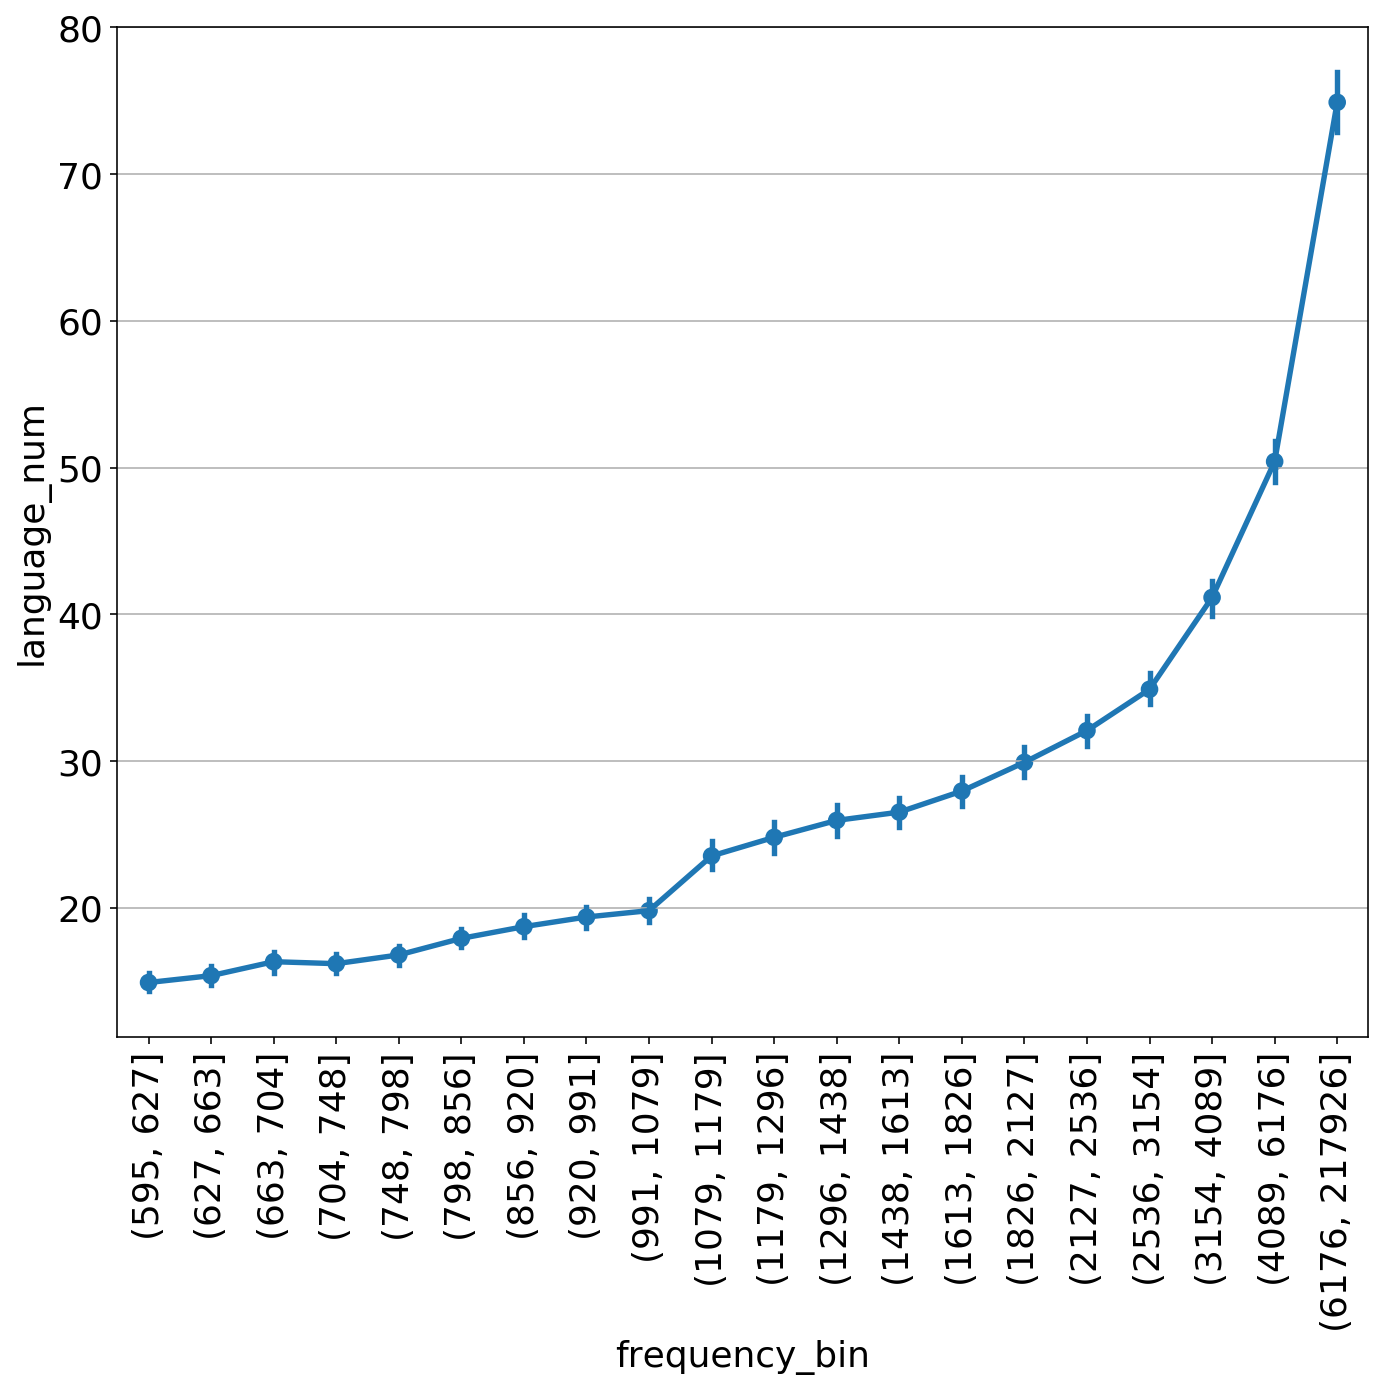

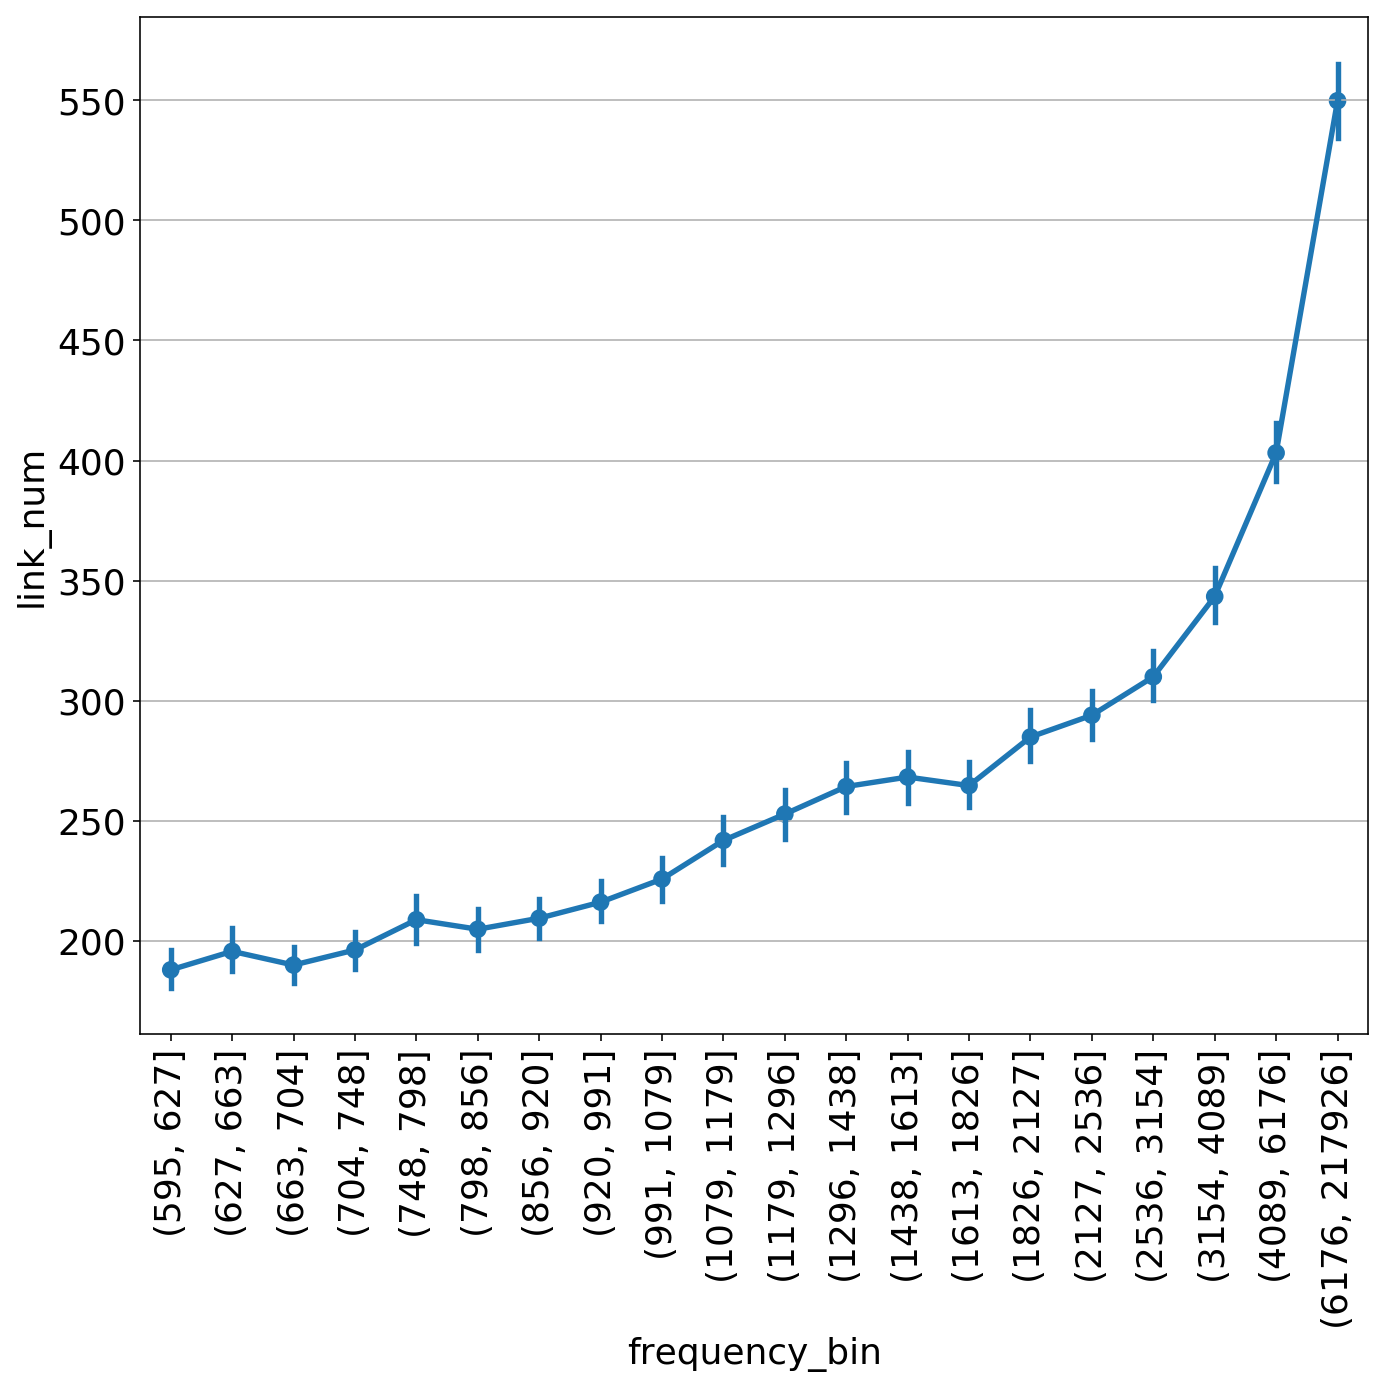

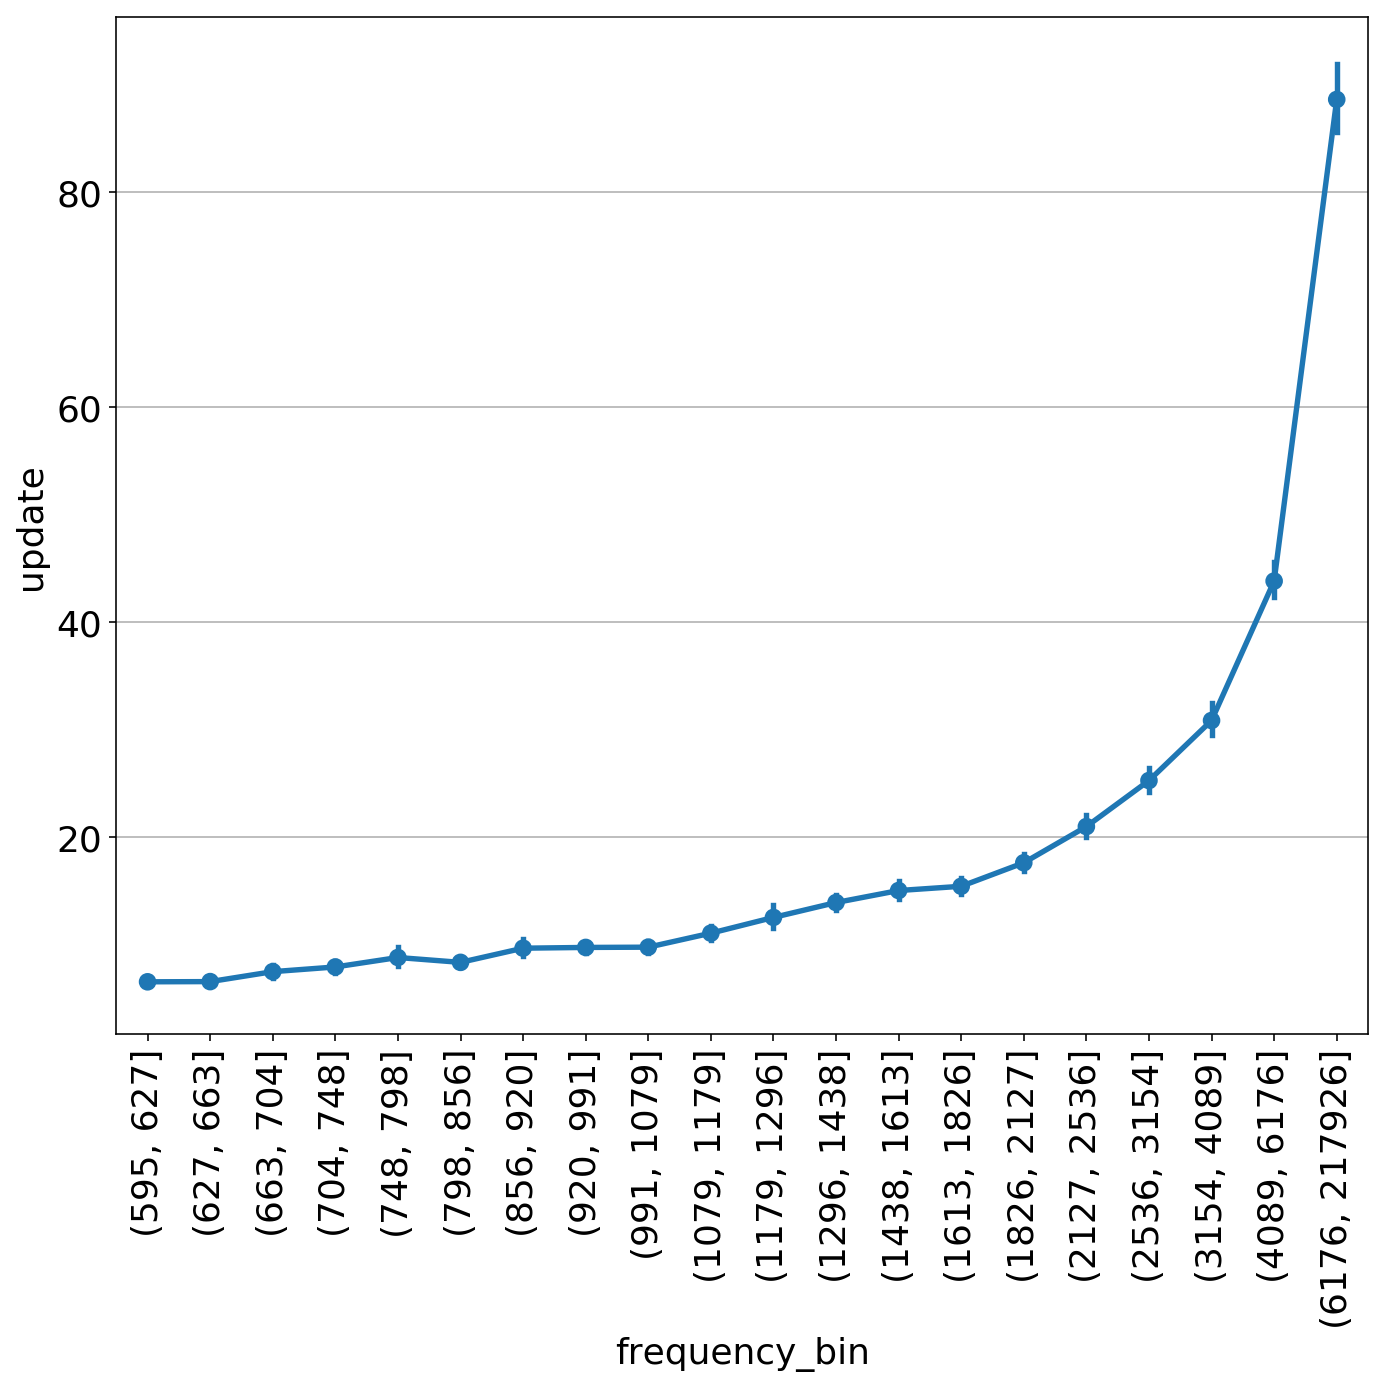

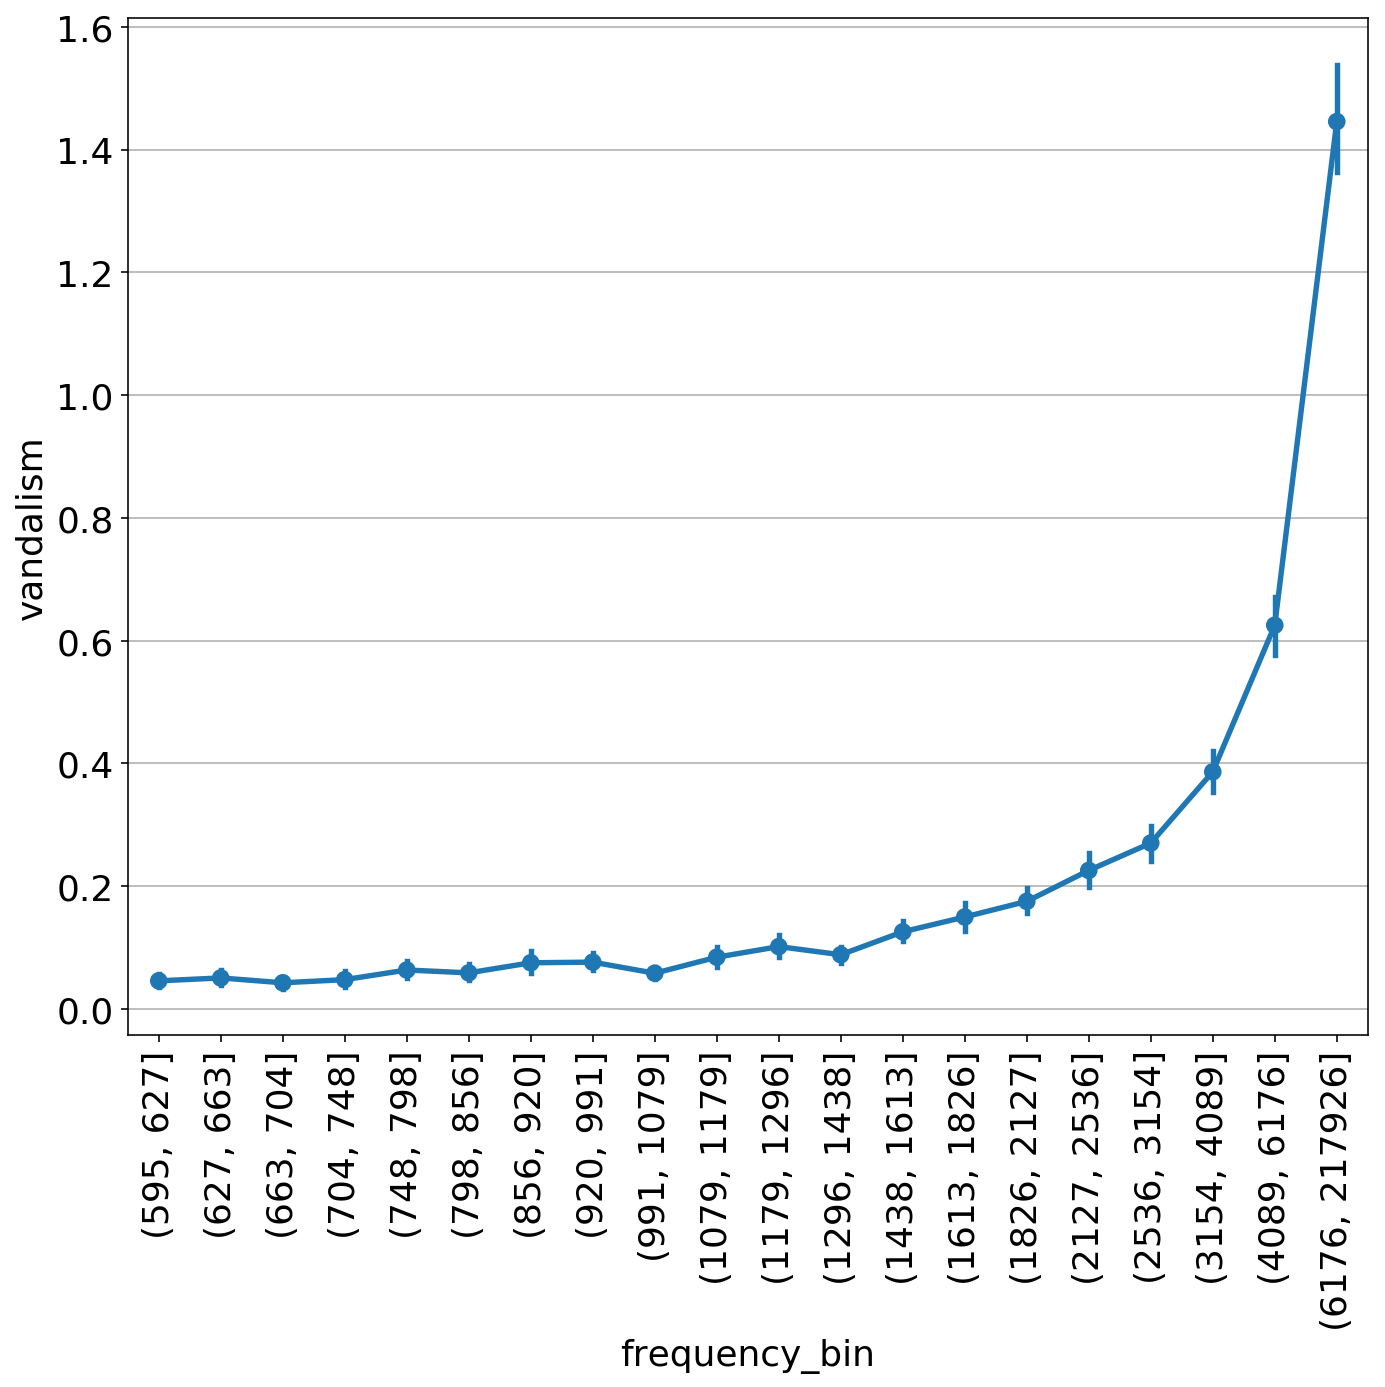

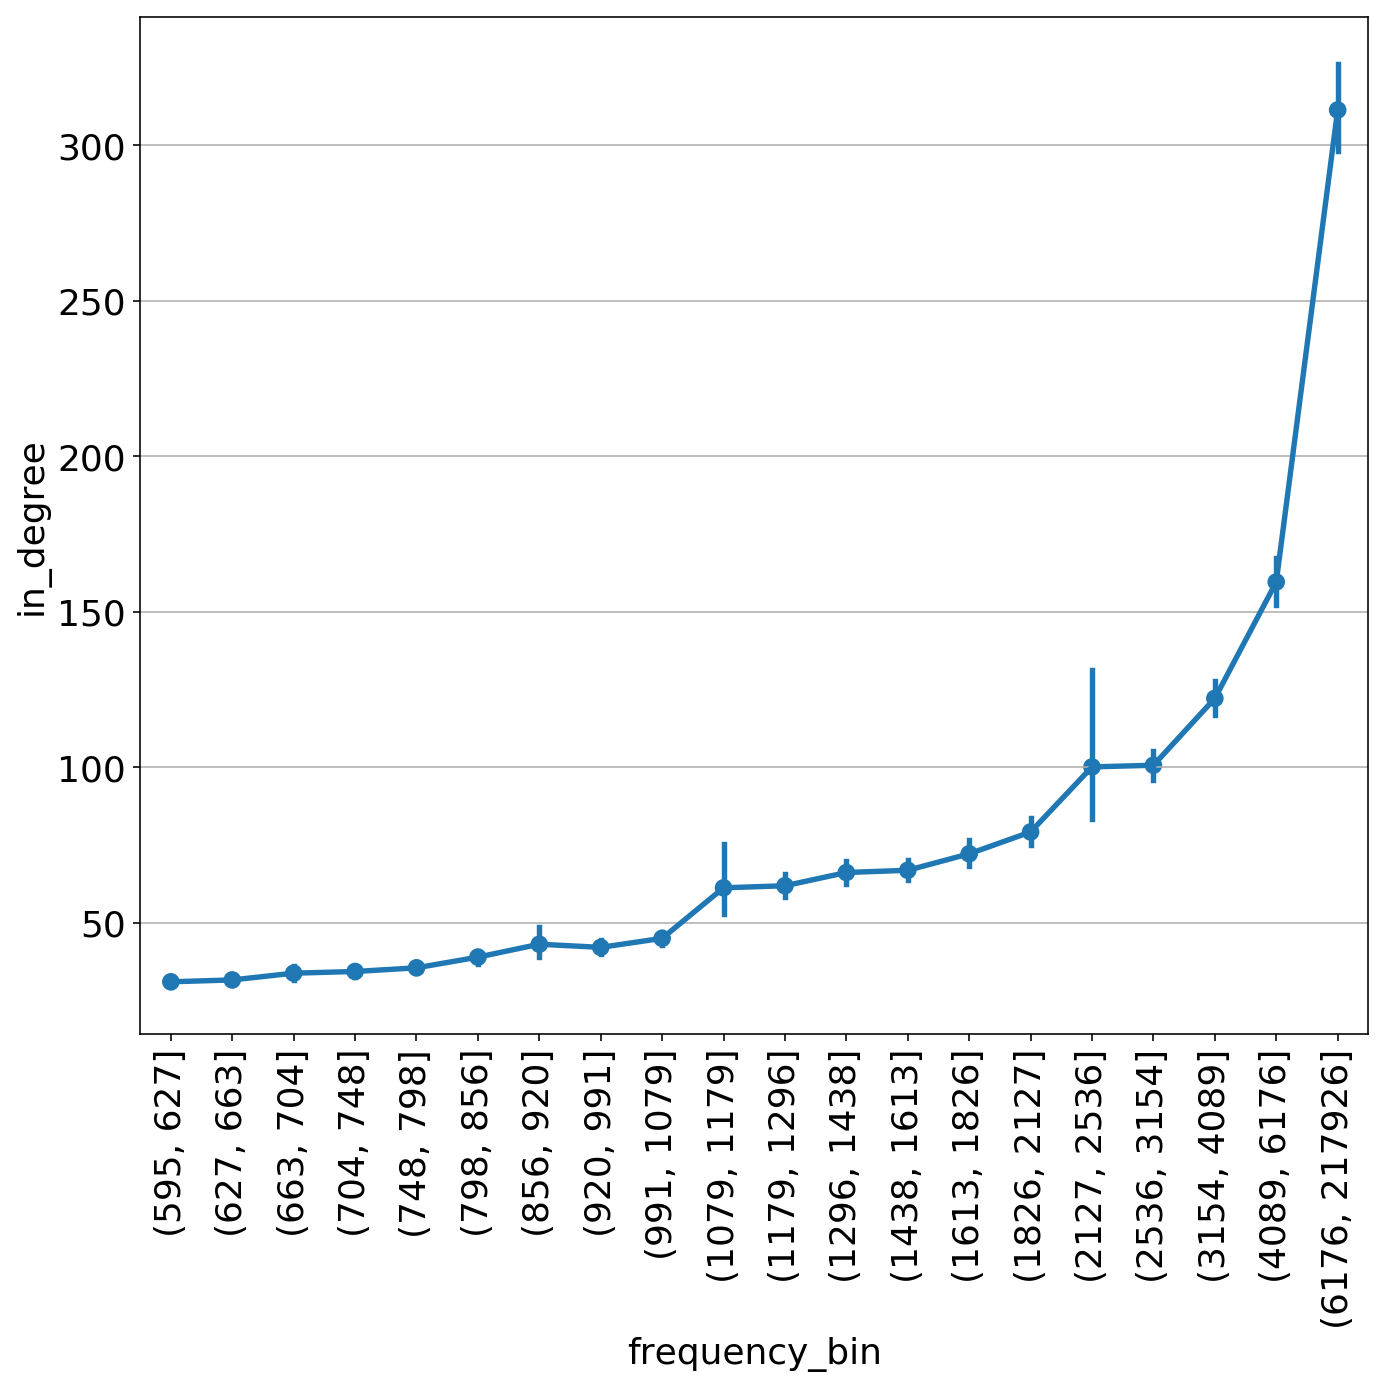

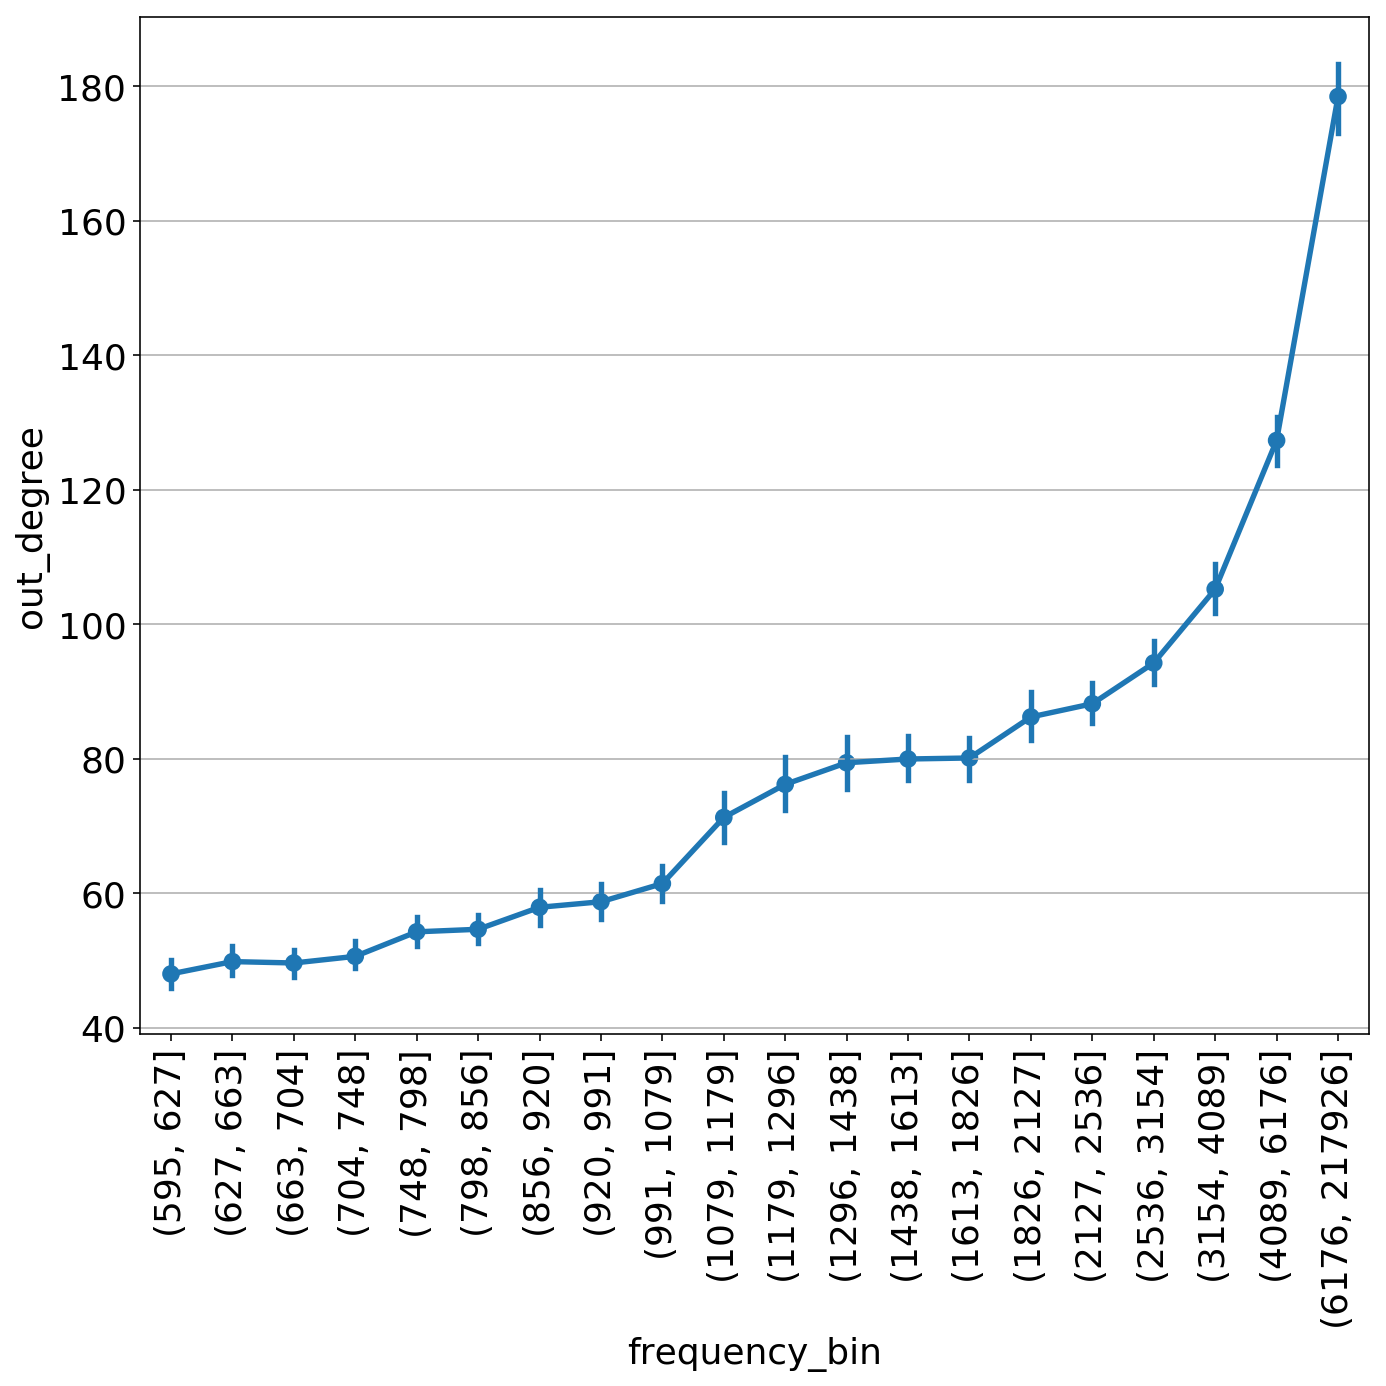

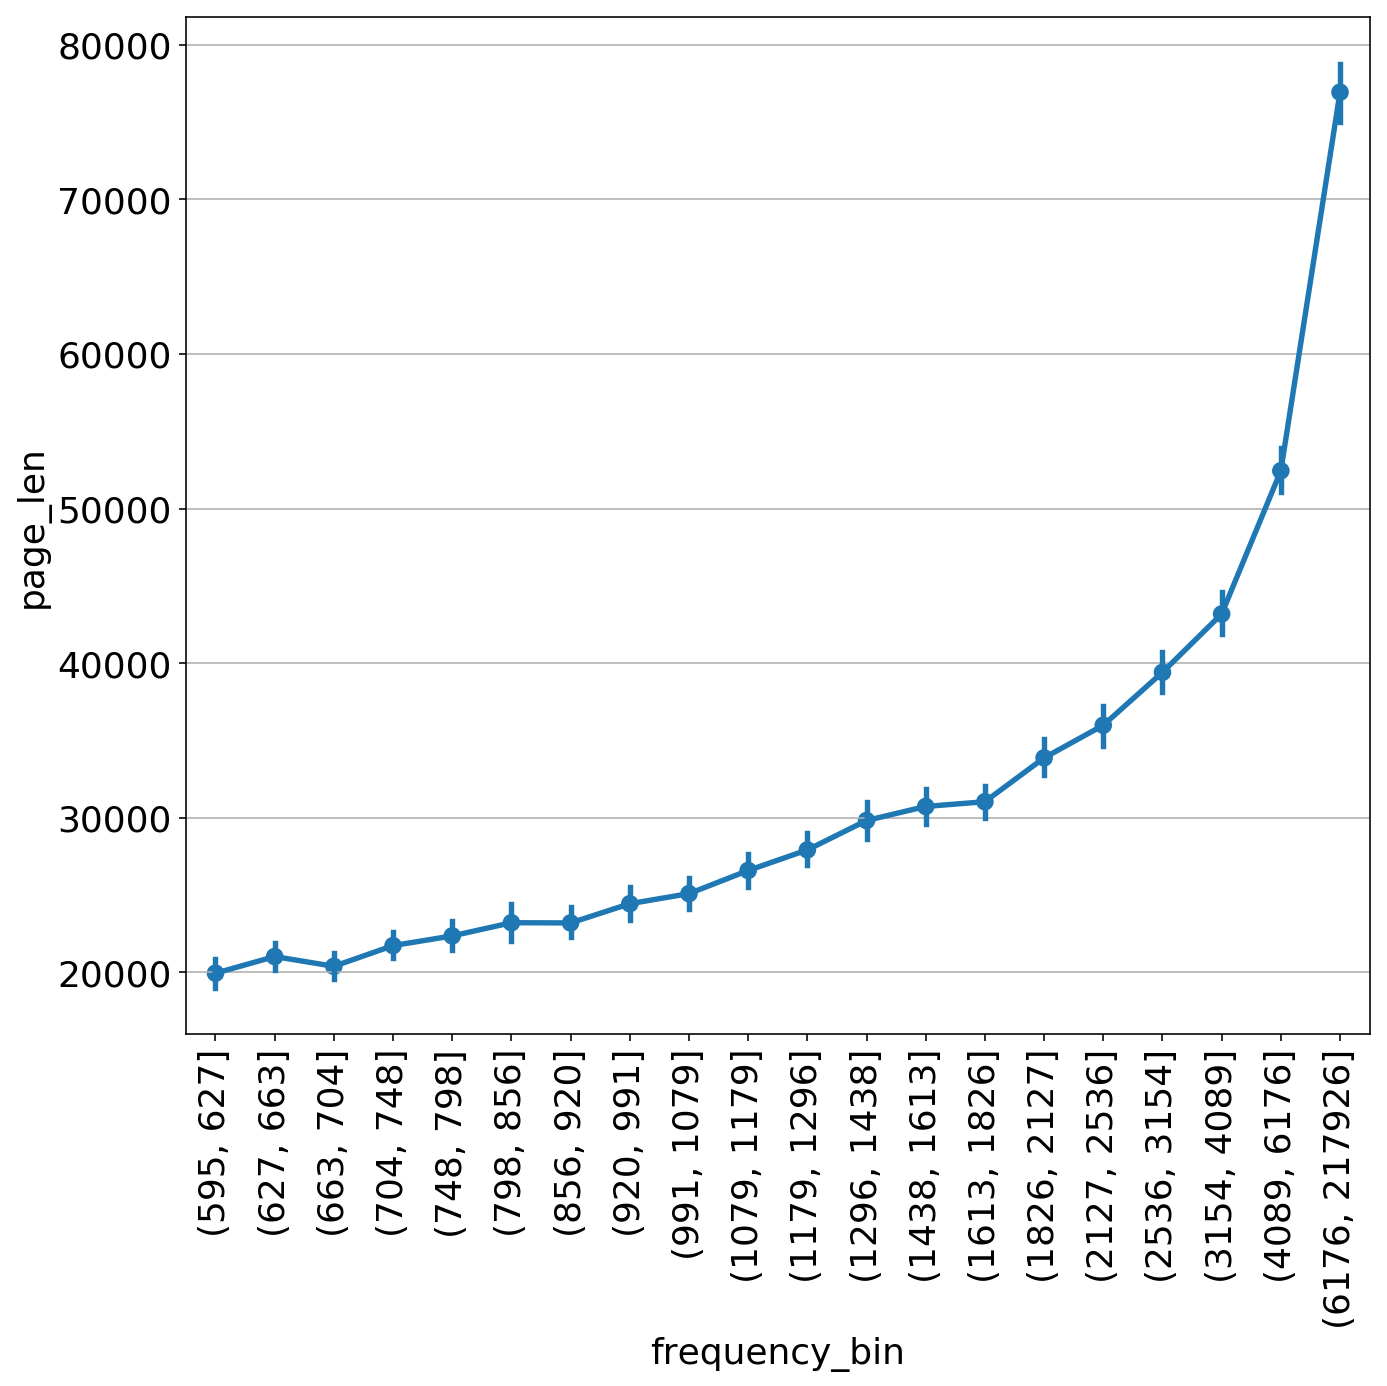

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

<Figure size 720x720 with 0 Axes>

In [137]:
for column in list(visit_count_df.columns)[2:-2]:
    plt.figure(figsize=(10,10))
    sns.pointplot(x='frequency_bin', y=column,data=visit_count_df)
    plt.xticks(rotation='vertical')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./plots/title_frequency_%s.png'%column,dpi=400)
    plt.show()

3189


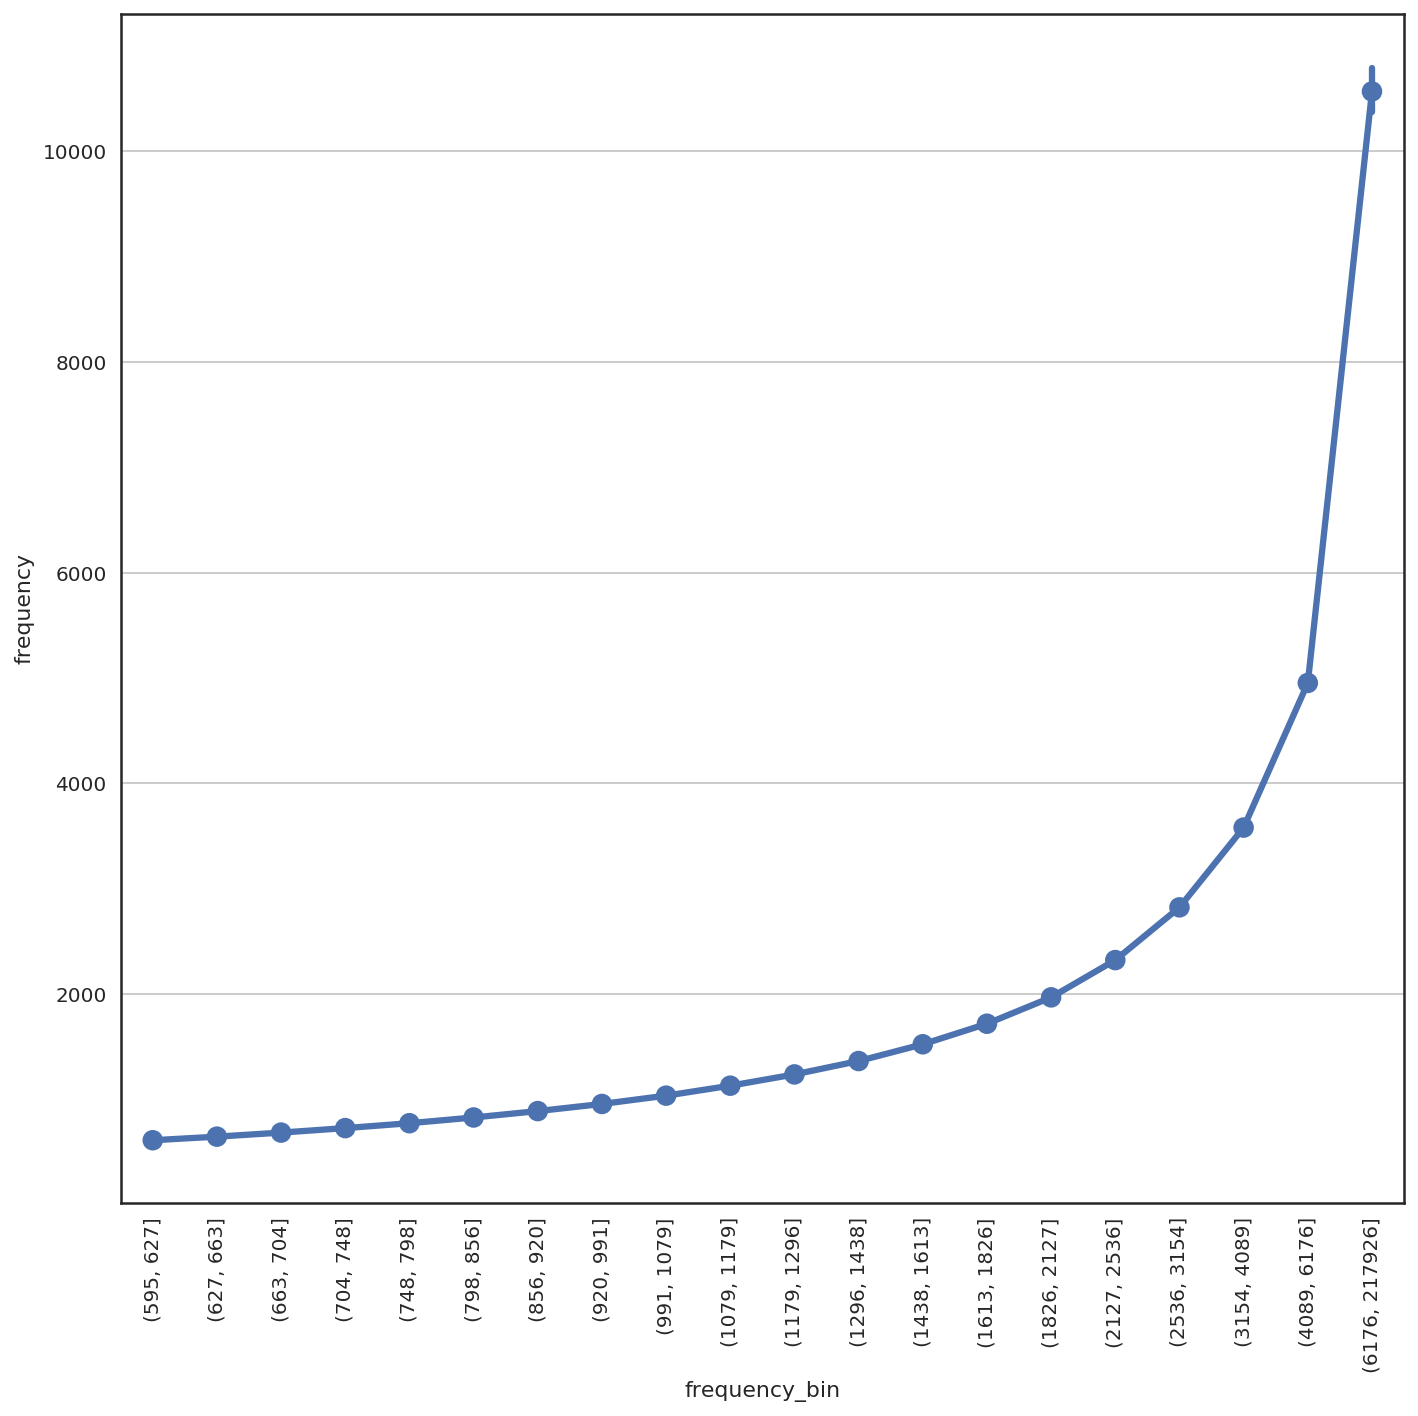

3189


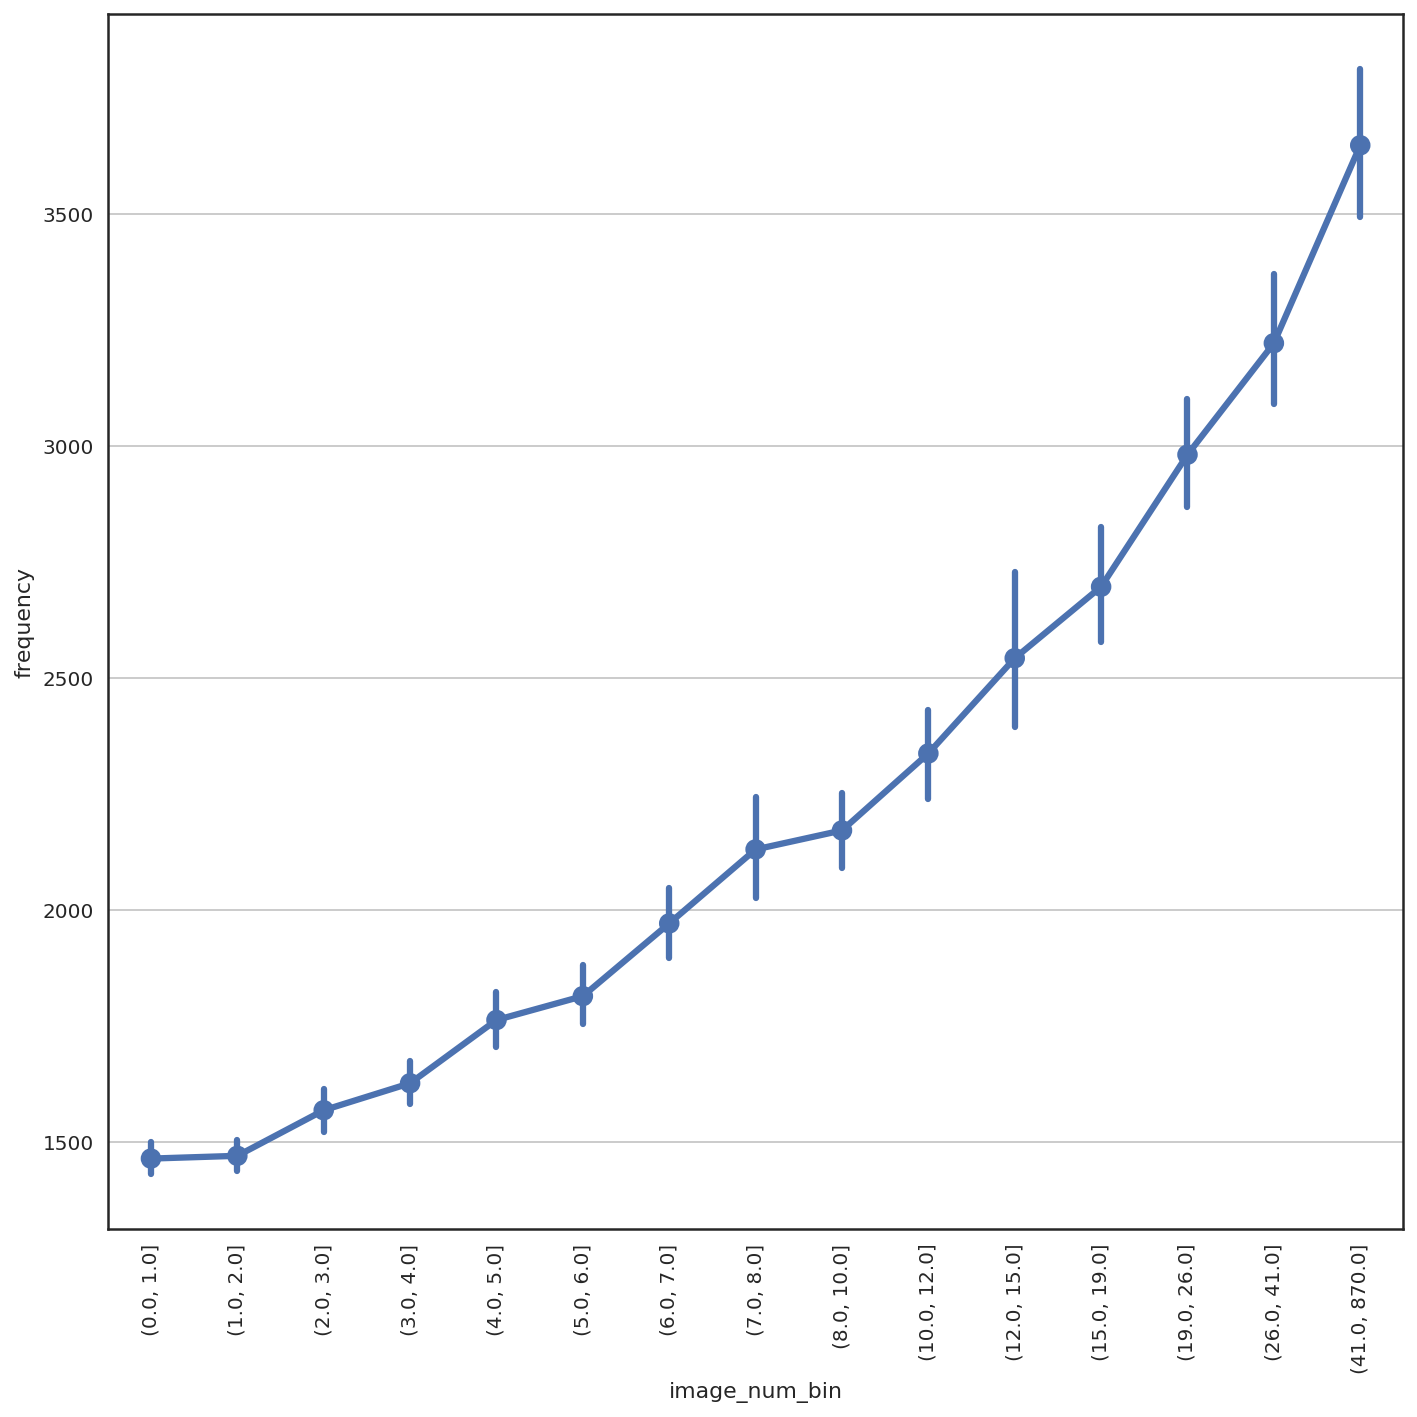

3189


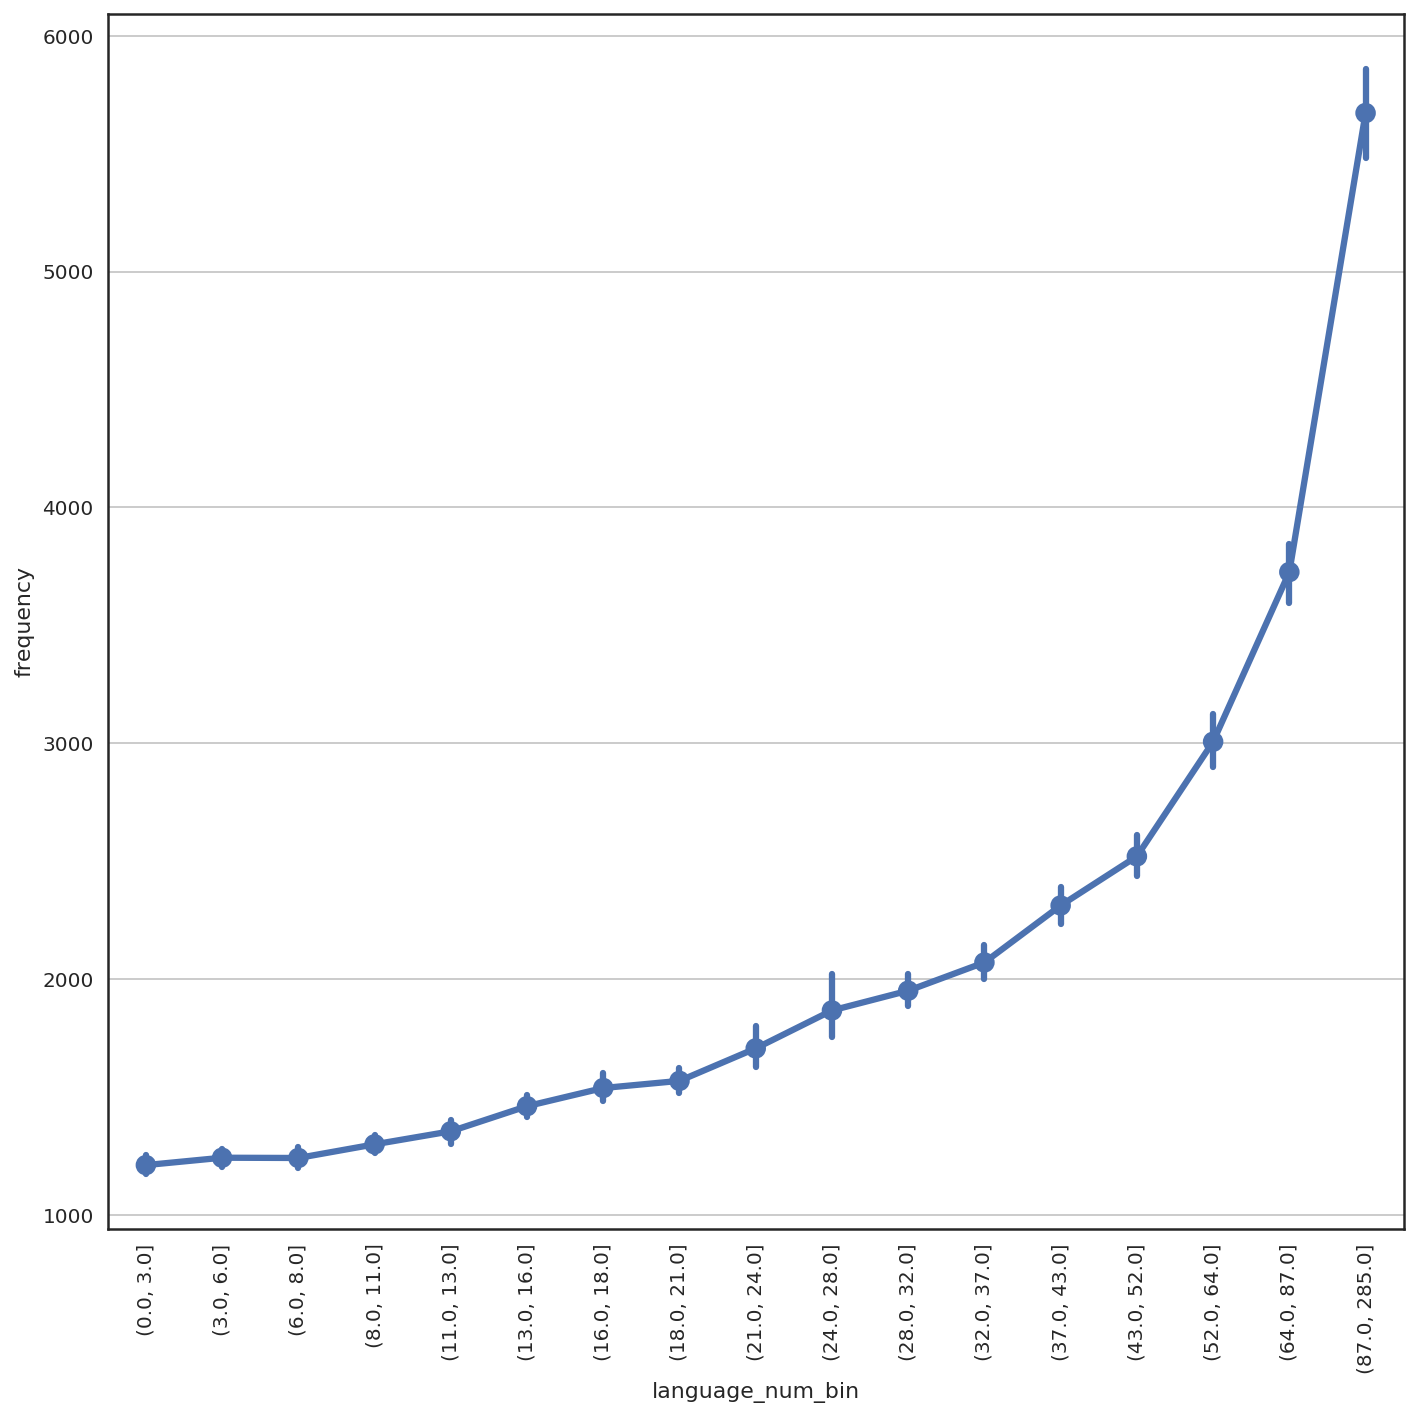

3189


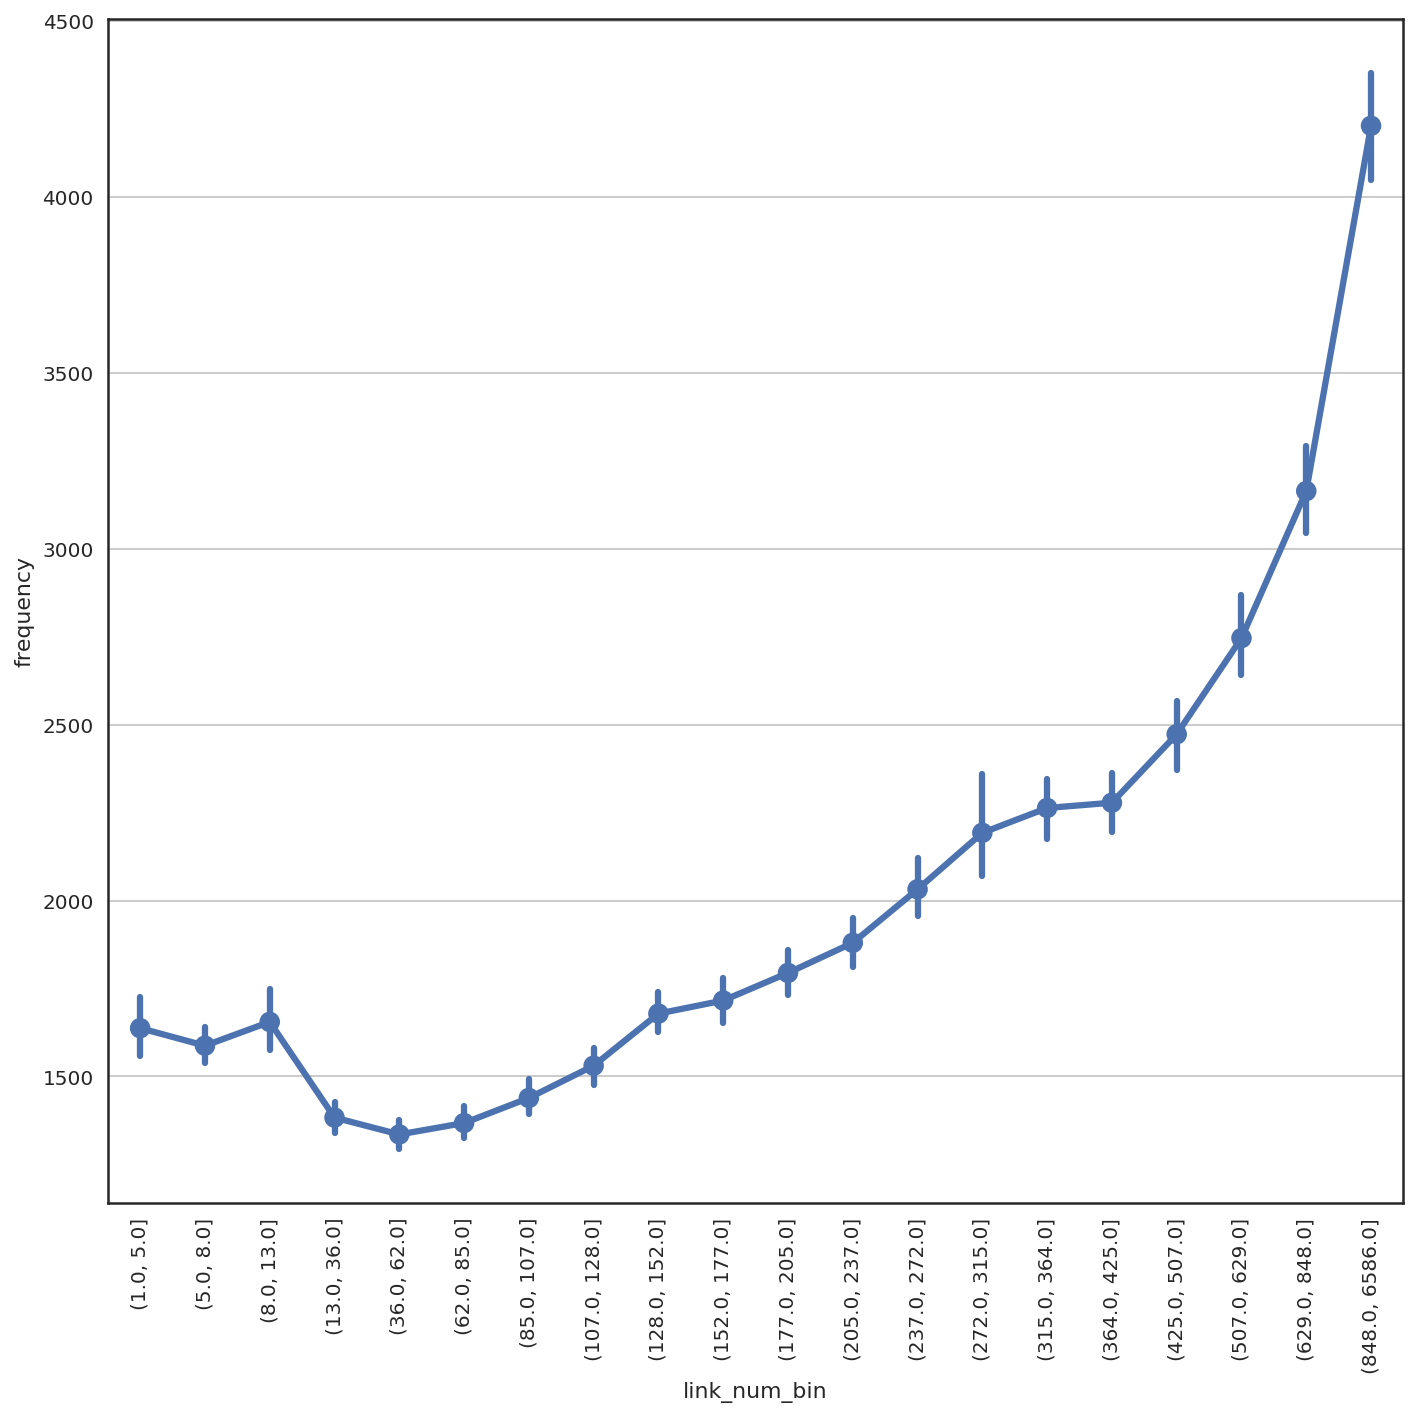

3189


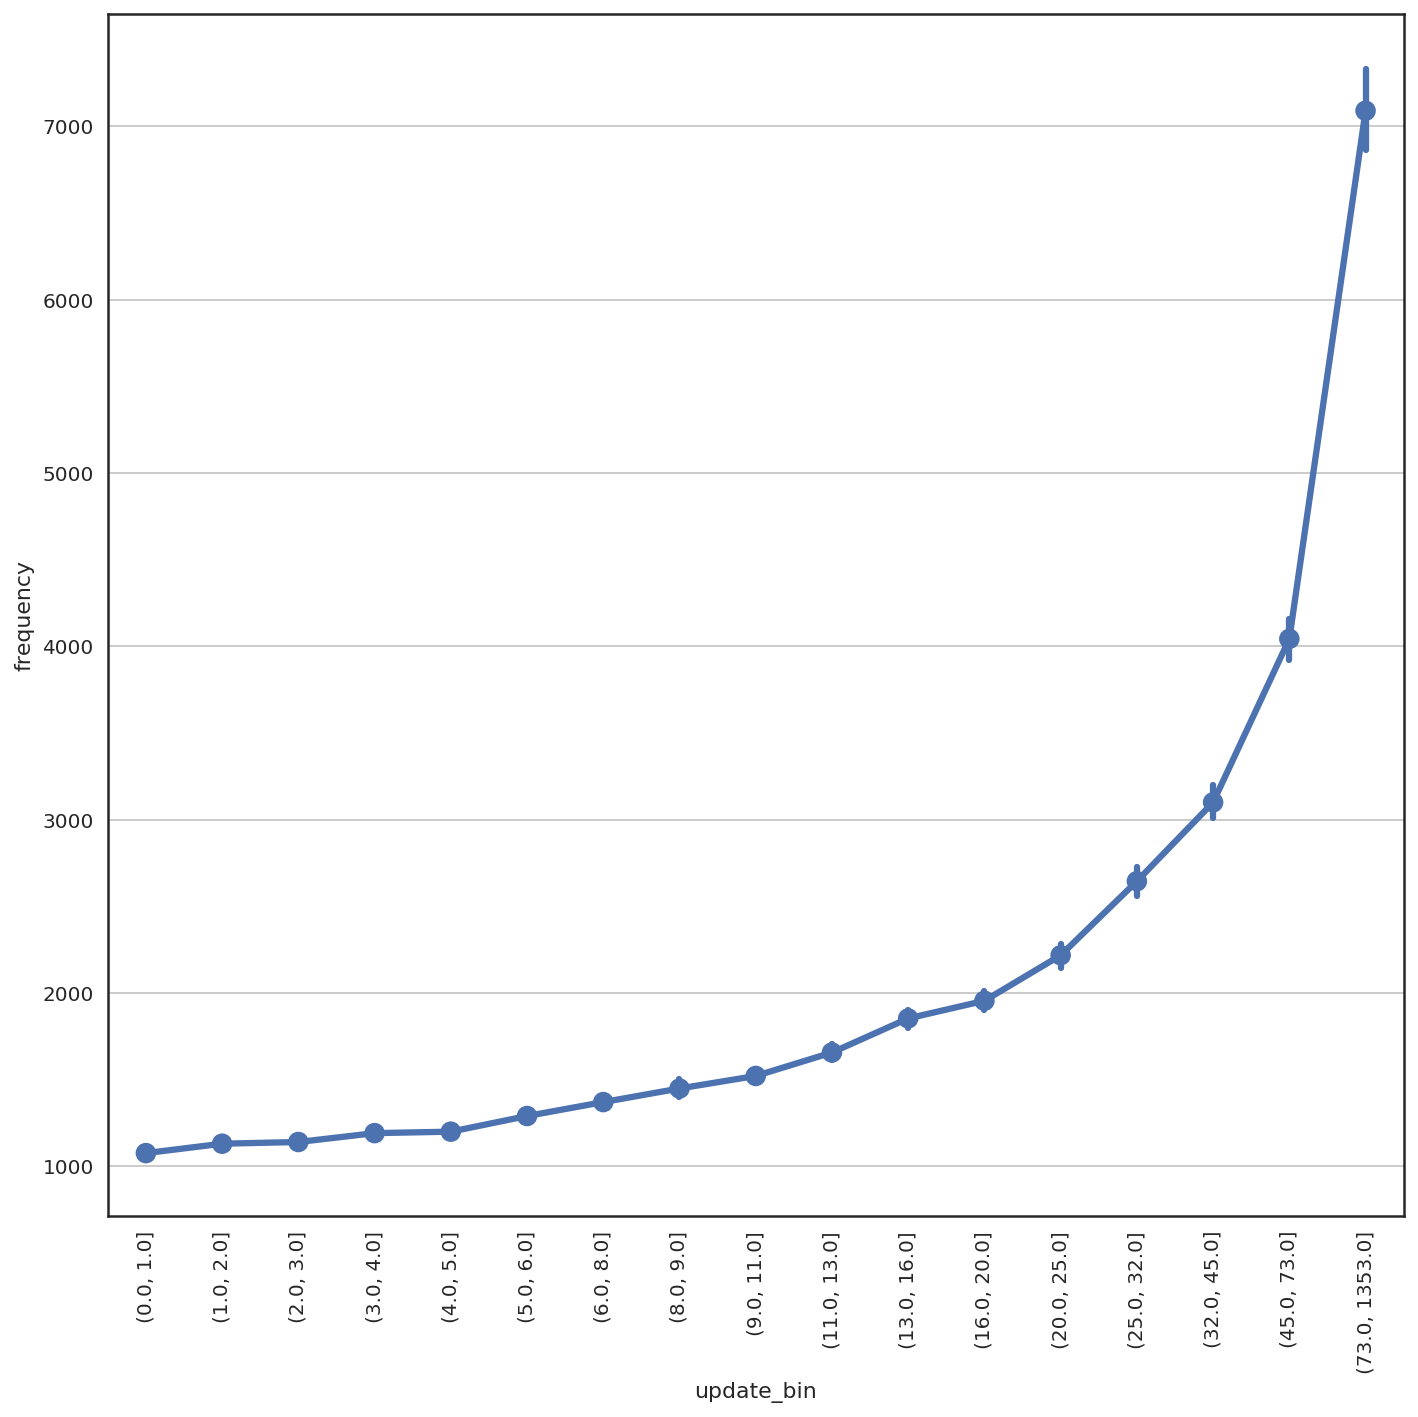

3189


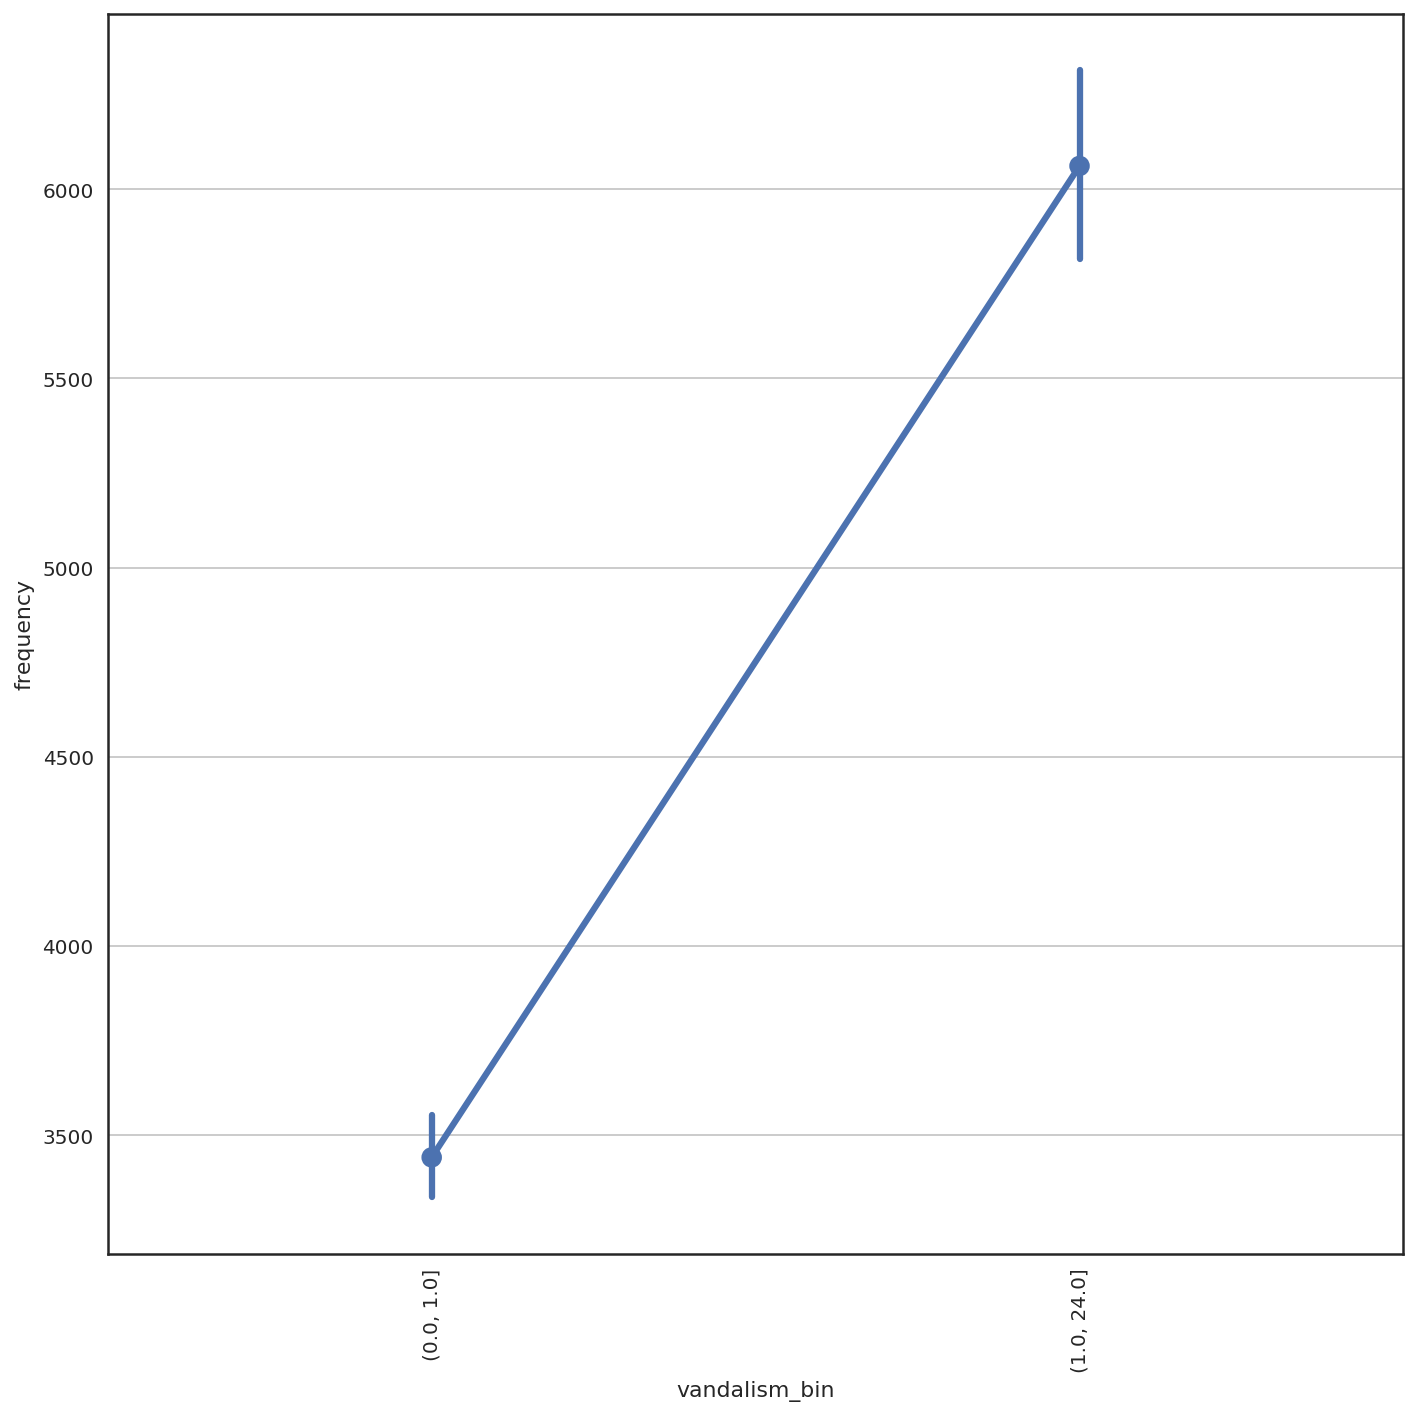

3189


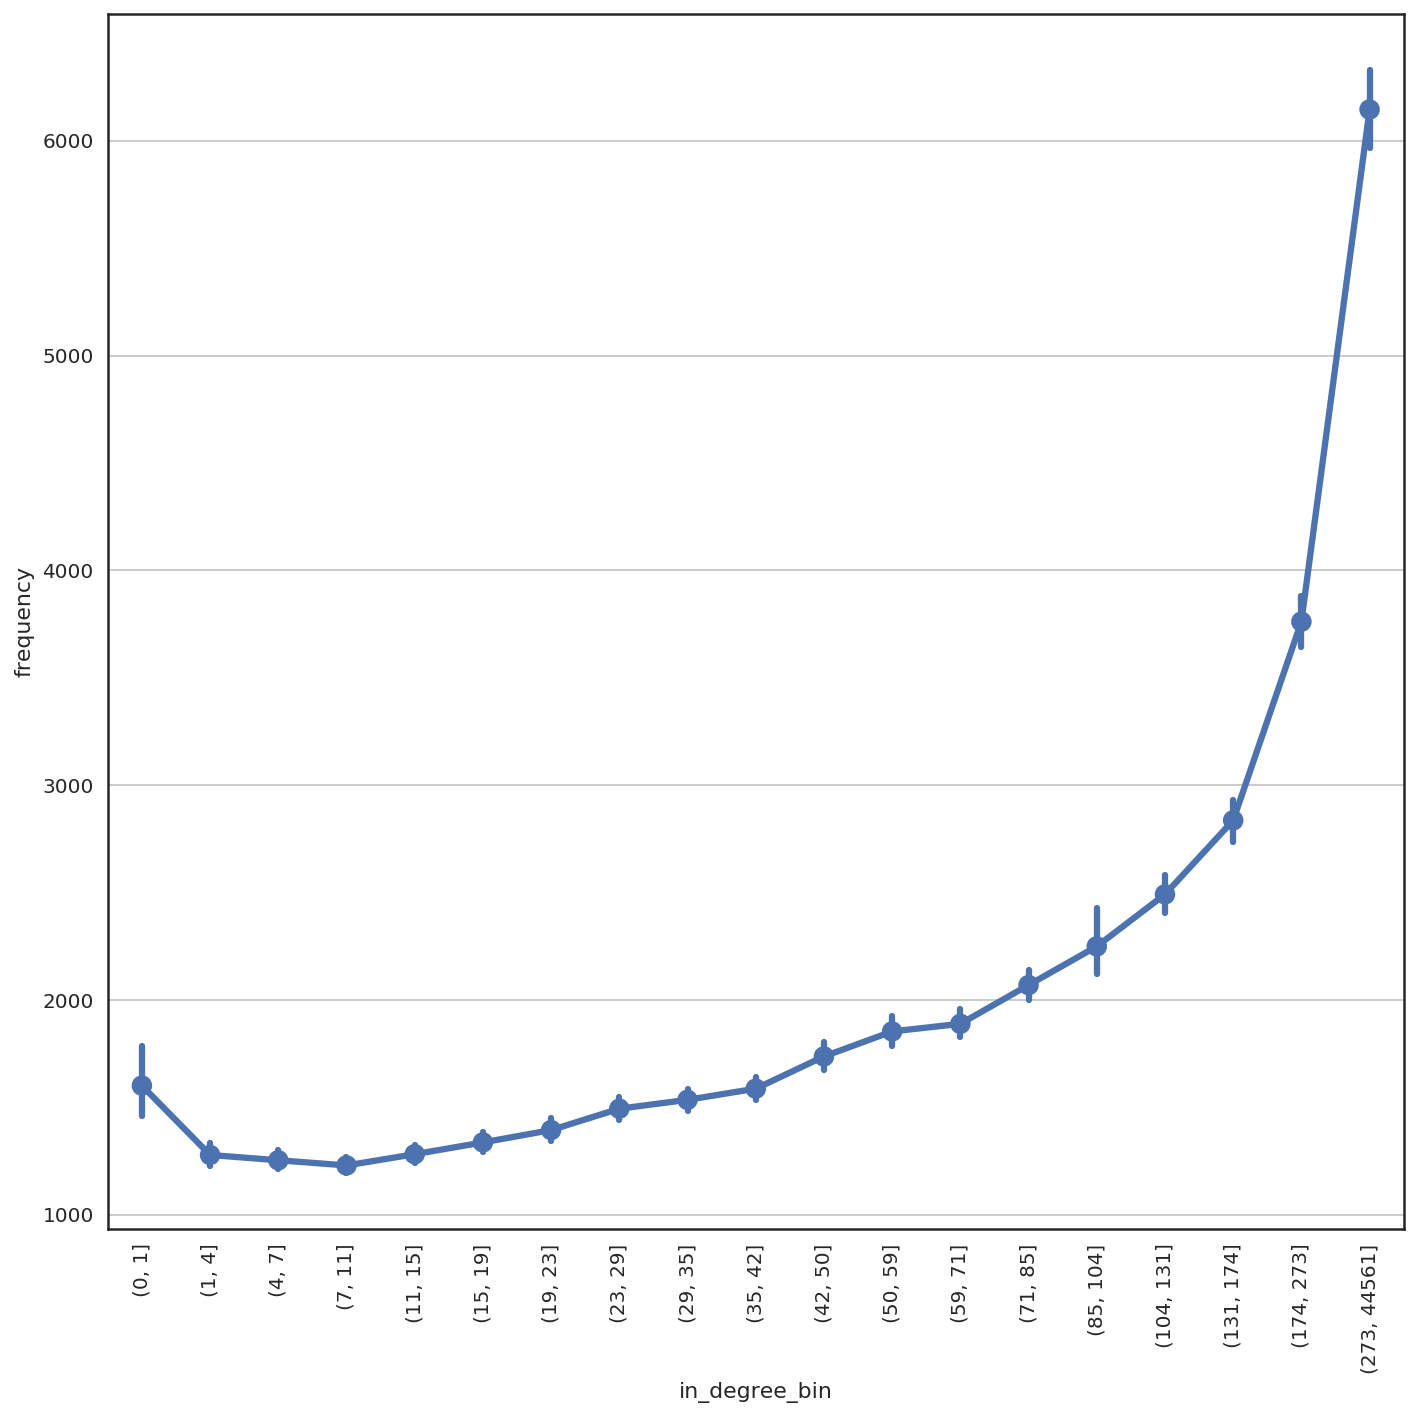

3189


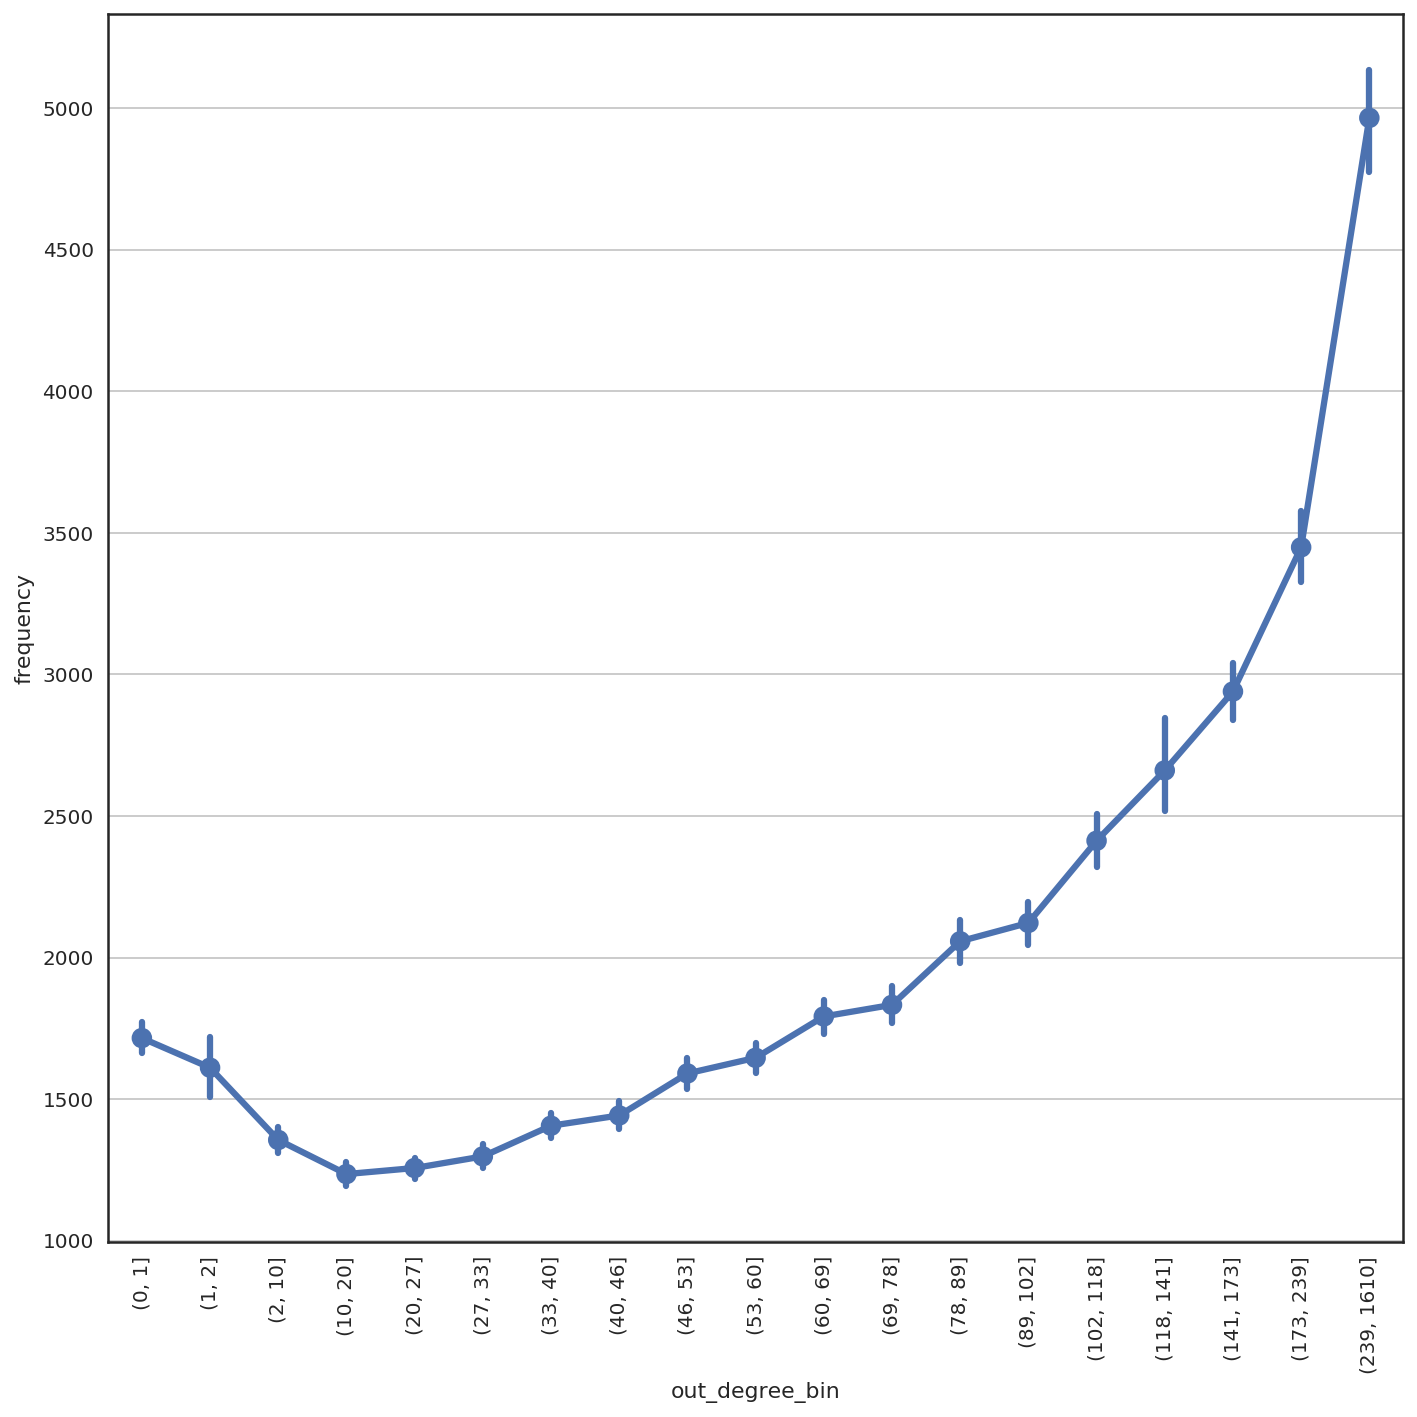

3189


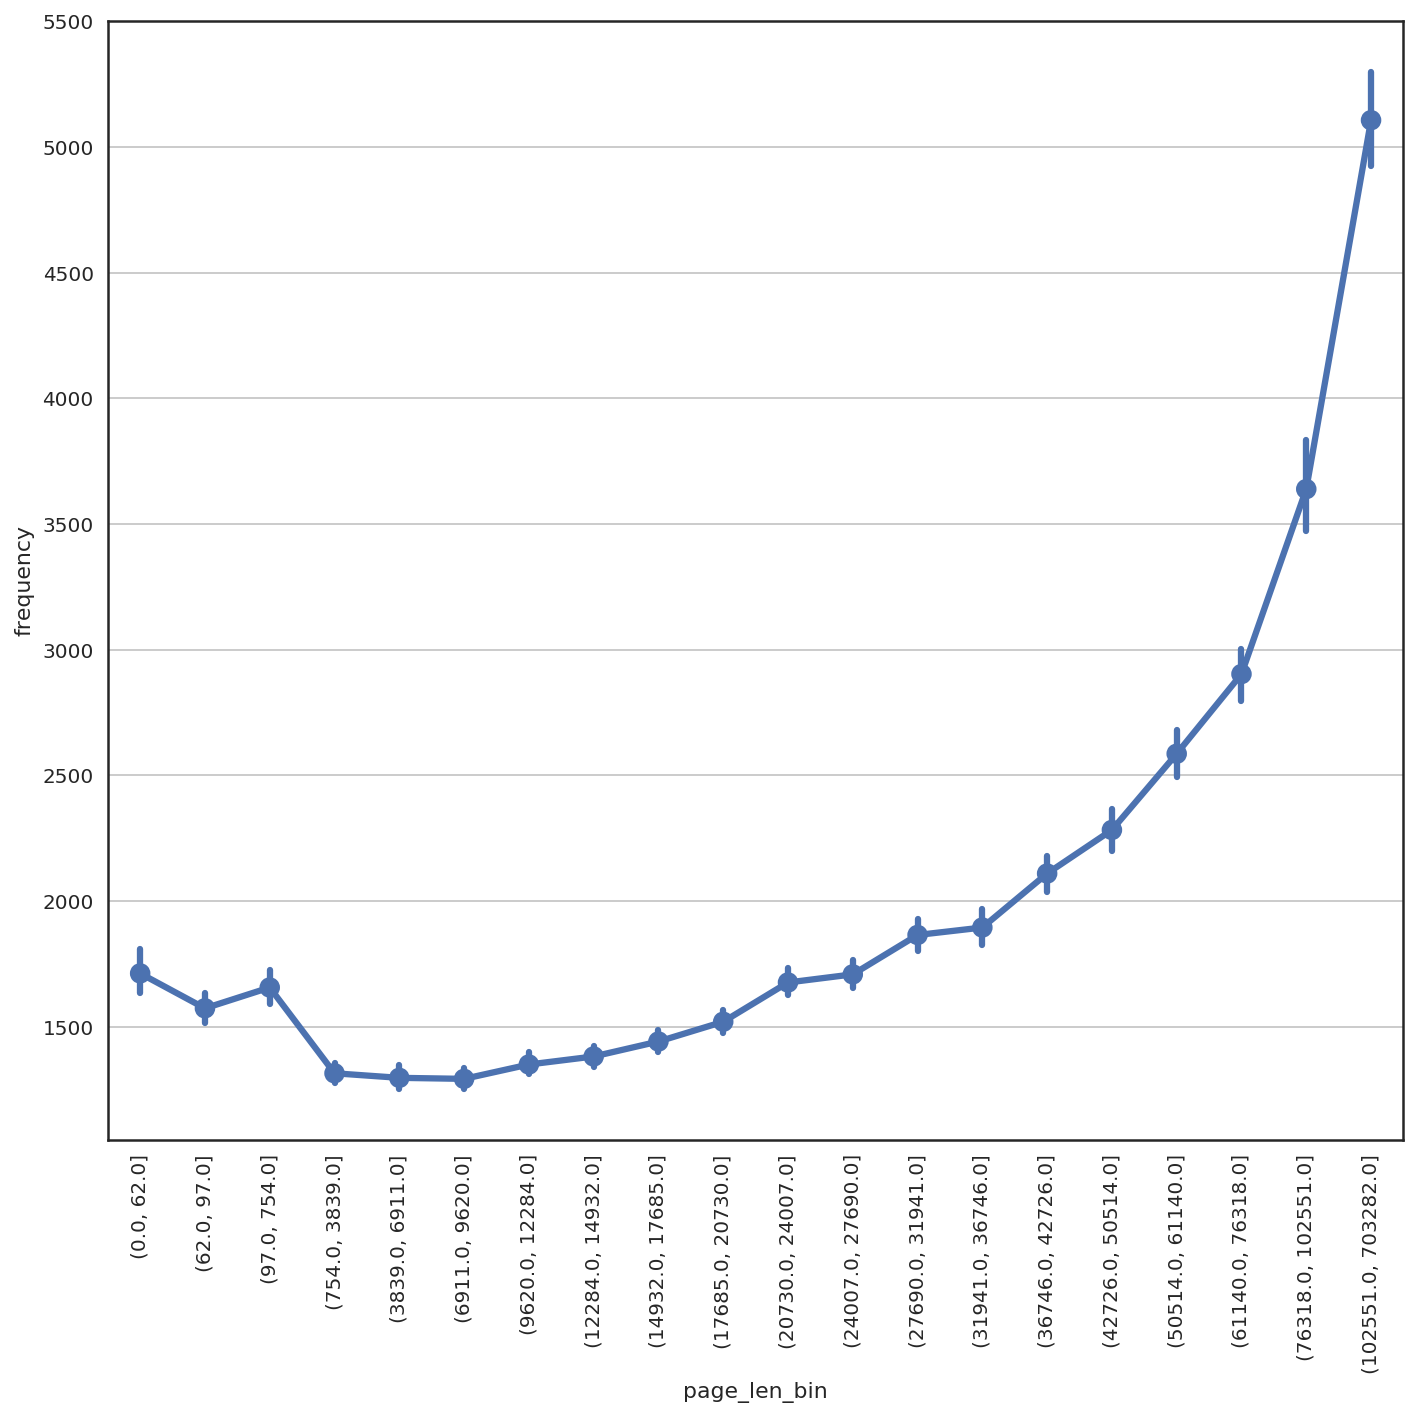

In [330]:
for column in columns:
    plt.figure(figsize=(10,10))
    visit_count_df[column+'_bin']= pandas.cut(visit_count_df[column], seperate_list(visit_count_df[column].values,20))
    sns.pointplot(y='frequency', x=column+'_bin',data=visit_count_df)
    plt.xticks(rotation='vertical')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./plots/title_frequency_%s.png'%column,dpi=400)
    plt.show()

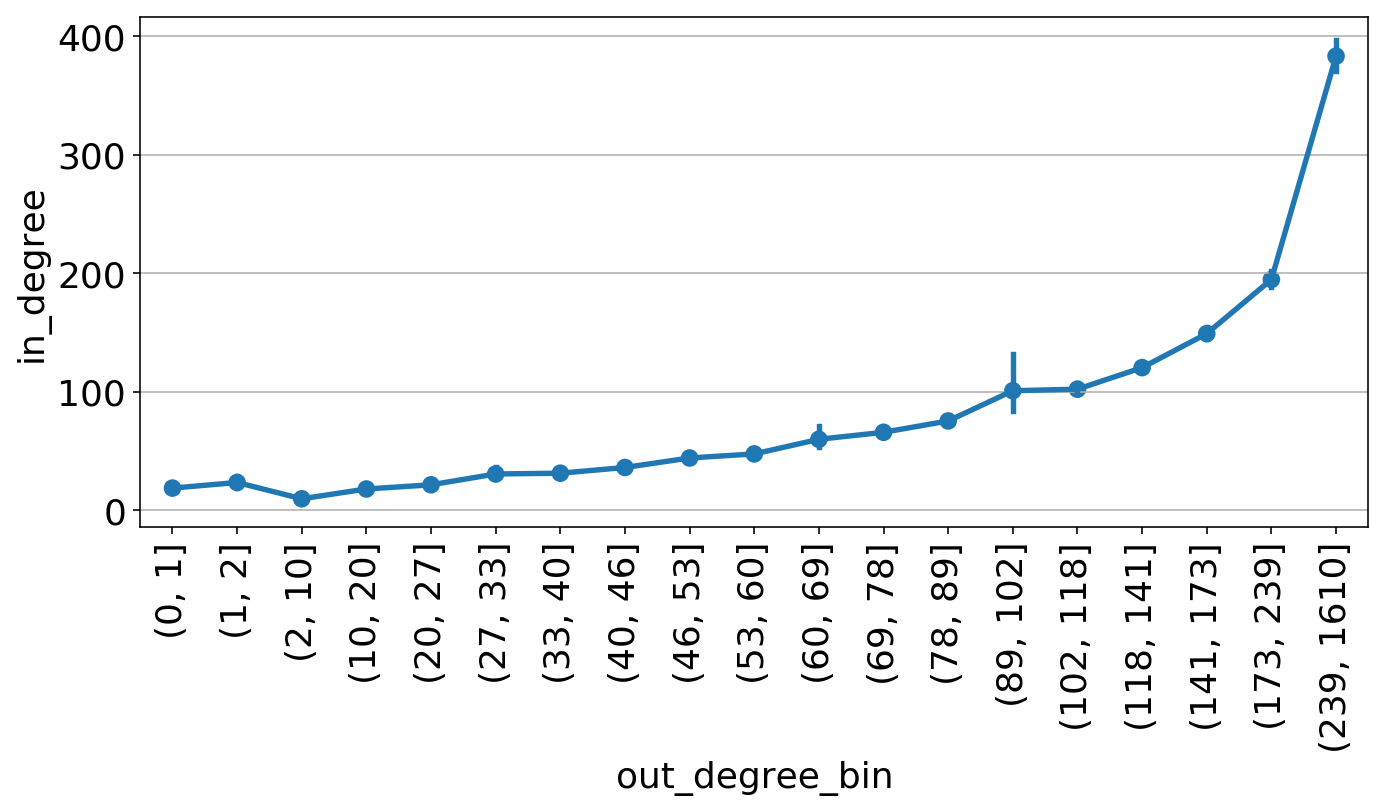

In [140]:
plt.figure(figsize=(10,6))
sns.pointplot(x='out_degree_bin', y='in_degree',data=visit_count_df)
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('./plots/in_degree_wrt_out_degree.png',dpi=400)
plt.show()

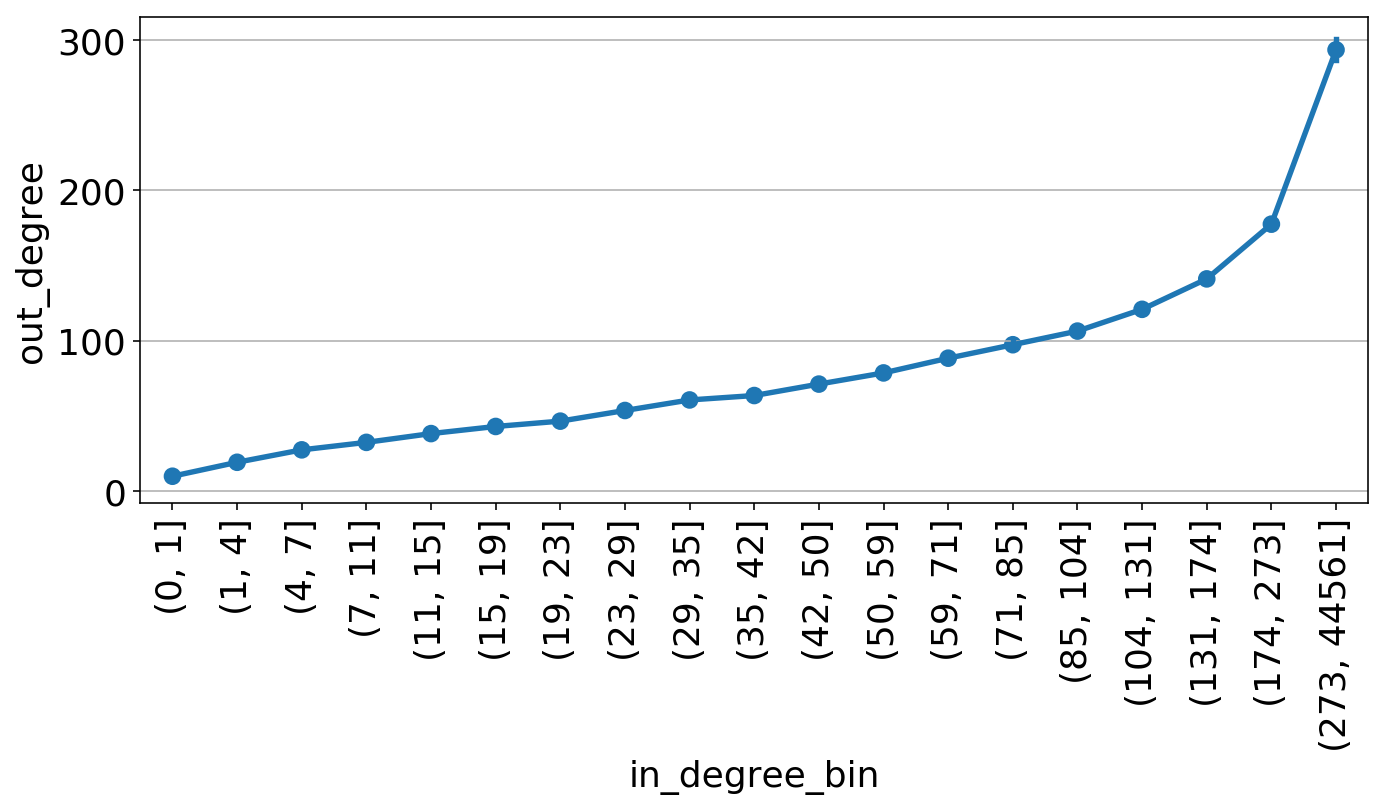

In [142]:
plt.figure(figsize=(10,6))
sns.pointplot(x='in_degree_bin', y='out_degree',data=visit_count_df)
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('./plots/out_degree_wrt_in_degree.png',dpi=400)
plt.show()

In [146]:
visit_count_df.columns

Index(['category_num', 'frequency', 'image_num', 'language_num', 'link_num',
       'update', 'vandalism', 'in_degree', 'out_degree', 'page_len', 'Title',
       'frequency_bin', 'out_degree_bin', 'in_degree_bin'],
      dtype='object')

In [327]:
columns=visit_count_df.columns[1:-4]

In [182]:
data=visit_count_df[columns].values

In [178]:
data=numpy.log(data+1)

In [183]:
corr=numpy.corrcoef(data,rowvar=False)

In [186]:
corr_df=pandas.DataFrame(corr,columns=columns,index=columns)

In [187]:
corr_df

frequency  image_num  language_num  link_num    update  \
frequency      1.000000   0.192900      0.397530  0.257889  0.566016   
image_num      0.192900   1.000000      0.446284  0.494772  0.232542   
language_num   0.397530   0.446284      1.000000  0.549423  0.350330   
link_num       0.257889   0.494772      0.549423  1.000000  0.320743   
update         0.566016   0.232542      0.350330  0.320743  1.000000   
vandalism      0.381302   0.152010      0.290910  0.183478  0.512826   
in_degree      0.259519   0.201242      0.375996  0.313987  0.196850   
out_degree     0.292718   0.419794      0.637199  0.828536  0.336610   
page_len       0.347605   0.521704      0.483099  0.708701  0.421194   

              vandalism  in_degree  out_degree  page_len  
frequency      0.381302   0.259519    0.292718  0.347605  
image_num      0.152010   0.201242    0.419794  0.521704  
language_num   0.290910   0.375996    0.637199  0.483099  
link_num       0.183478   0.313987    0.828536  0.708701  
update         0.512826   0.196850    0.336610  0.421194  
vandalism      1.000000   0.163109    0.194744  0.225886  
in_degree      0.163109   1.000000    0.347998  0.267383  
out_degree     0.194744   0.347998    1.000000  0.630508  
page_len       0.225886   0.267383    0.630508  1.000000

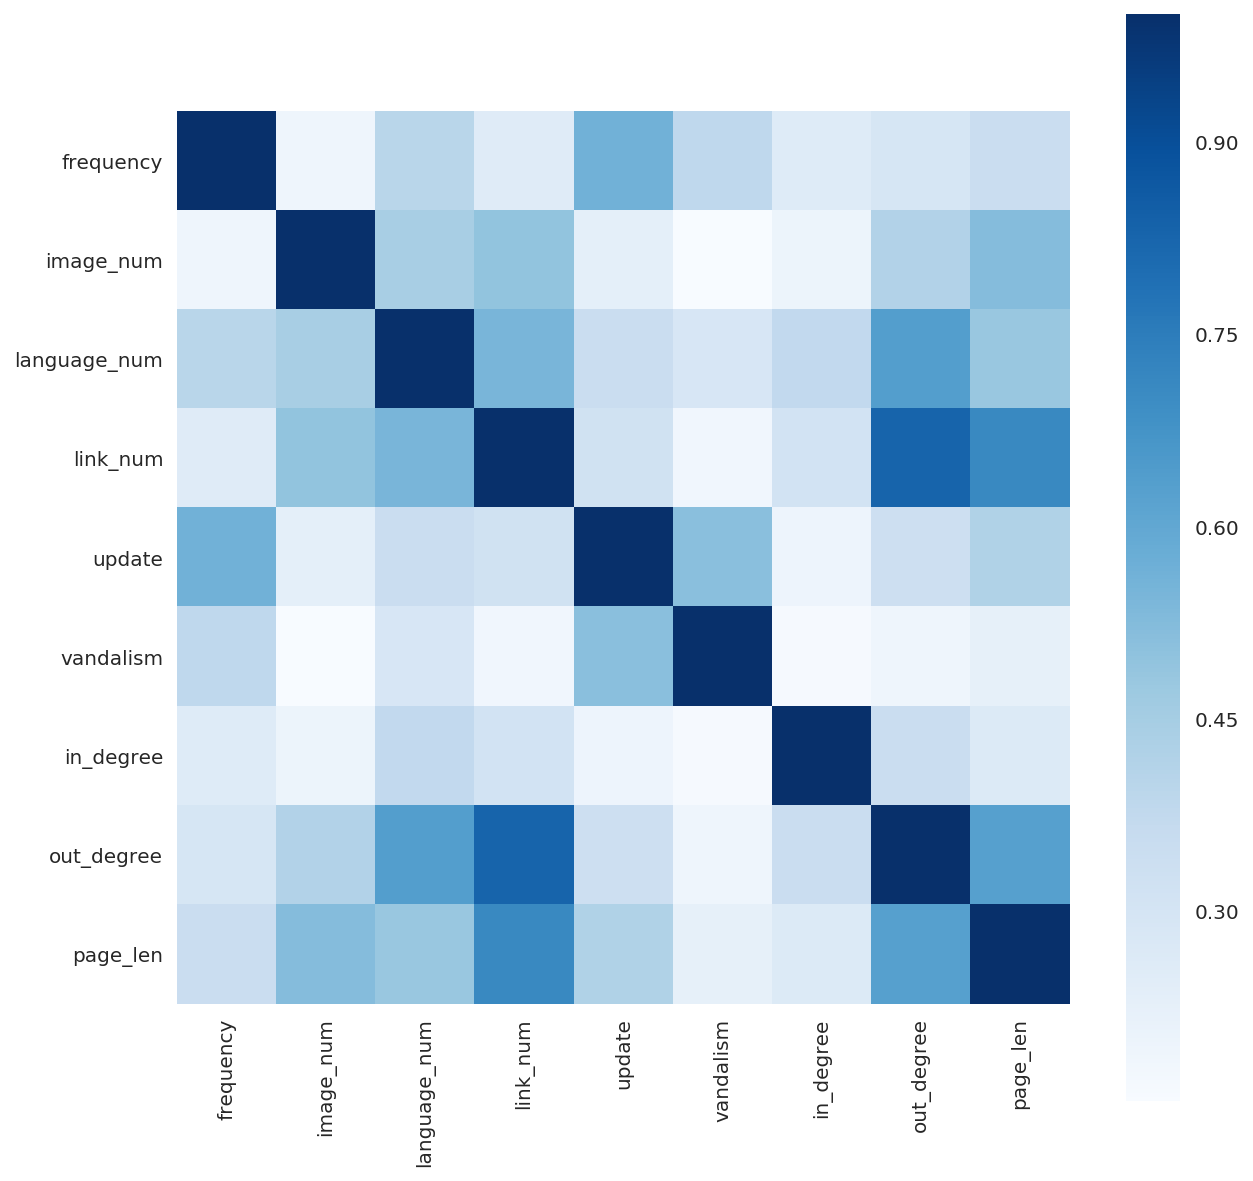

In [188]:
plt.figure(figsize=(10,10))
sns.set(style="white")
mask = numpy.zeros((9,9), dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap= sns.color_palette("YlGnBu",as_cmap=True)
# cmap = sns.color_palette('Reds')
# cmap = sns.light_palette((210, 90, 60), input="husl")
sns.heatmap(corr_df, cmap='Blues', square=True)
plt.show()

In [191]:
data=visit_count_df[columns].values

In [192]:
data=numpy.log(data+1)

In [193]:
corr=numpy.corrcoef(data,rowvar=False)

In [194]:
corr_df=pandas.DataFrame(corr,columns=columns,index=columns)

<Figure size 720x720 with 0 Axes>

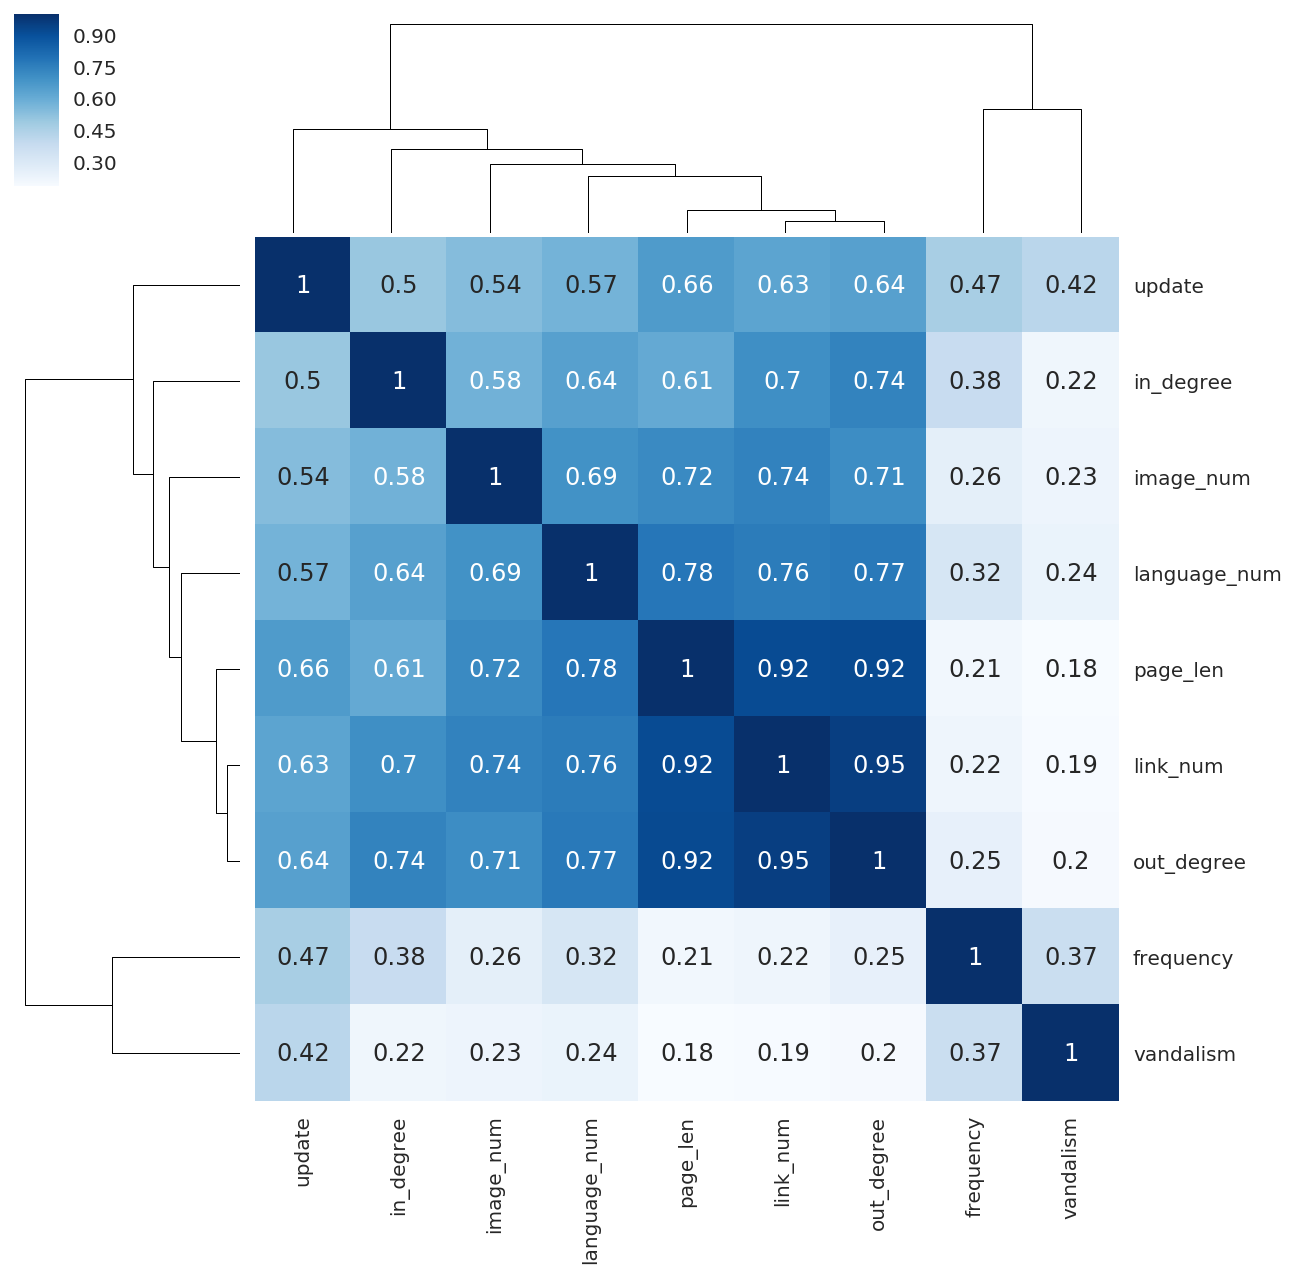

In [197]:
plt.figure(figsize=(10,10))
sns.set(style="white")
mask = numpy.zeros((9,9), dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap= sns.color_palette("YlGnBu",as_cmap=True)
# cmap = sns.color_palette('Reds')
# cmap = sns.light_palette((210, 90, 60), input="husl")
sns.clustermap(corr_df, cmap='Blues', square=True,annot=True)
plt.show()

In [313]:
columns=['frequency', 'image_num', 'language_num', 'link_num', 'update',
       'vandalism']

In [266]:
from sklearn import linear_model

In [314]:
X=visit_count_df[columns[1:]].values
y=visit_count_df[columns[0]]

In [315]:
from sklearn import preprocessing

In [316]:
X=numpy.log(X+1)
X=preprocessing.MinMaxScaler().fit_transform(X)
y=numpy.log(y)

In [317]:
lr = linear_model.LinearRegression()
lr.fit(X, numpy.log(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [318]:
y_pred=lr.predict(X)

In [319]:
result=pandas.DataFrame({'y':y,'y_pred':y_pred})

In [320]:
result=result[result['y']<30000]
result=result[result['y_pred']<30000]

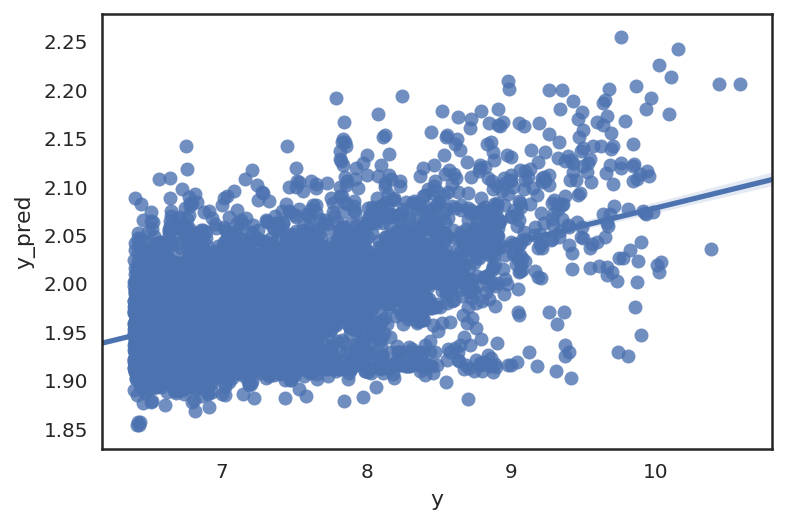

In [321]:
sns.regplot(x='y',y='y_pred',data=result.sample(frac=0.1))
plt.show()

In [322]:
lr.score(X,y)

-52.27308775125415

In [323]:
lr.coef_

array([ 0.03110271,  0.07841905, -0.13293202,  0.20705509,  0.1625473 ])

In [324]:
coef=pandas.DataFrame(list(zip(columns[1:],lr.coef_,['Linear Regression' for _ in range(len(columns[1:]))])), columns=['Meta Data','Coefficient','Method'])

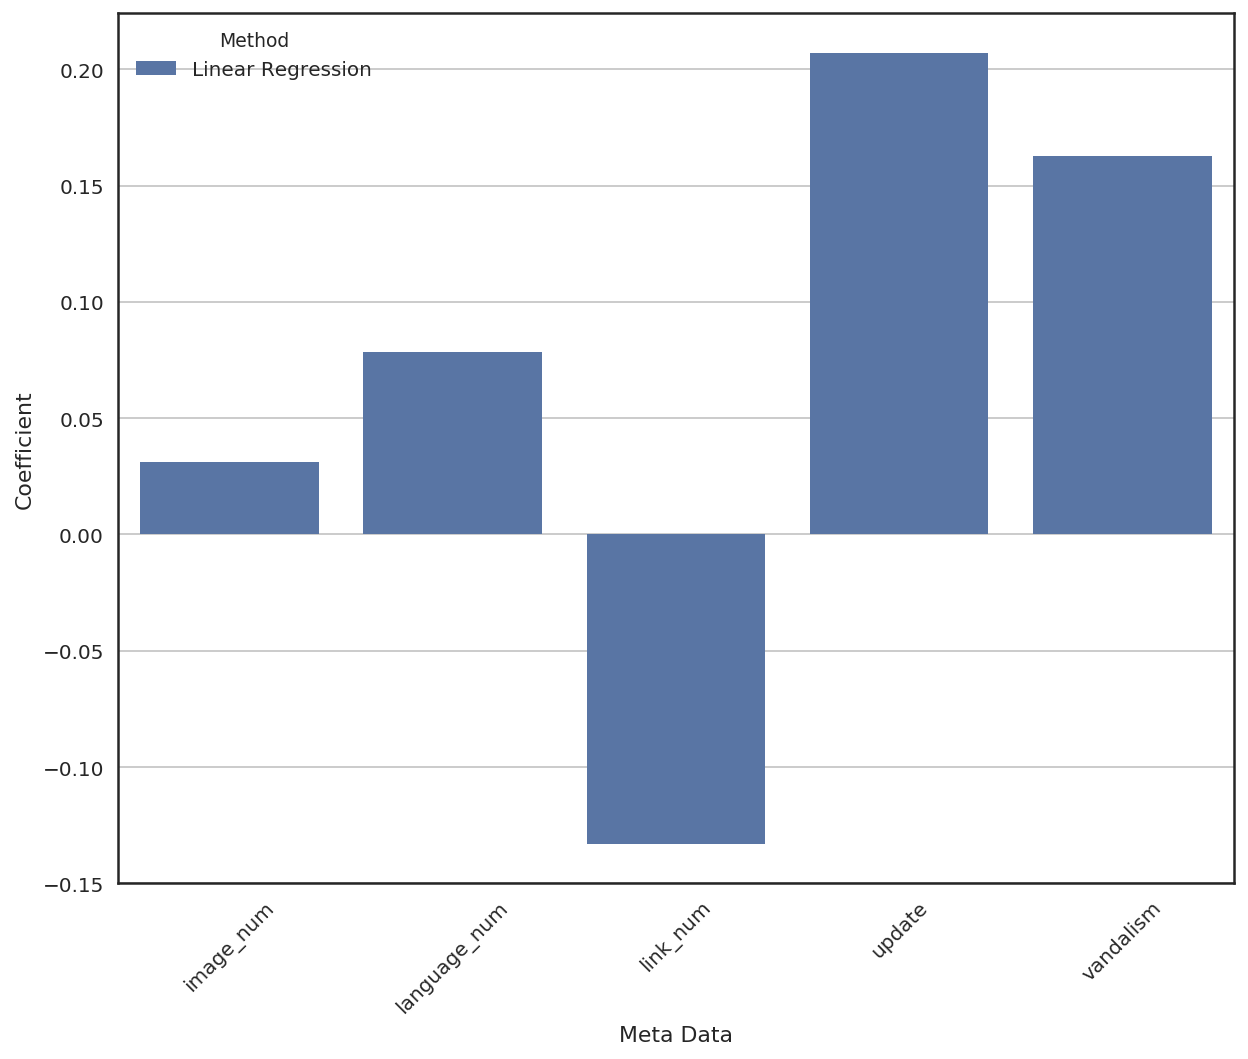

In [325]:
plt.figure(figsize=(10,8))
sns.barplot(x='Meta Data',y='Coefficient',hue='Method',data=coef)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


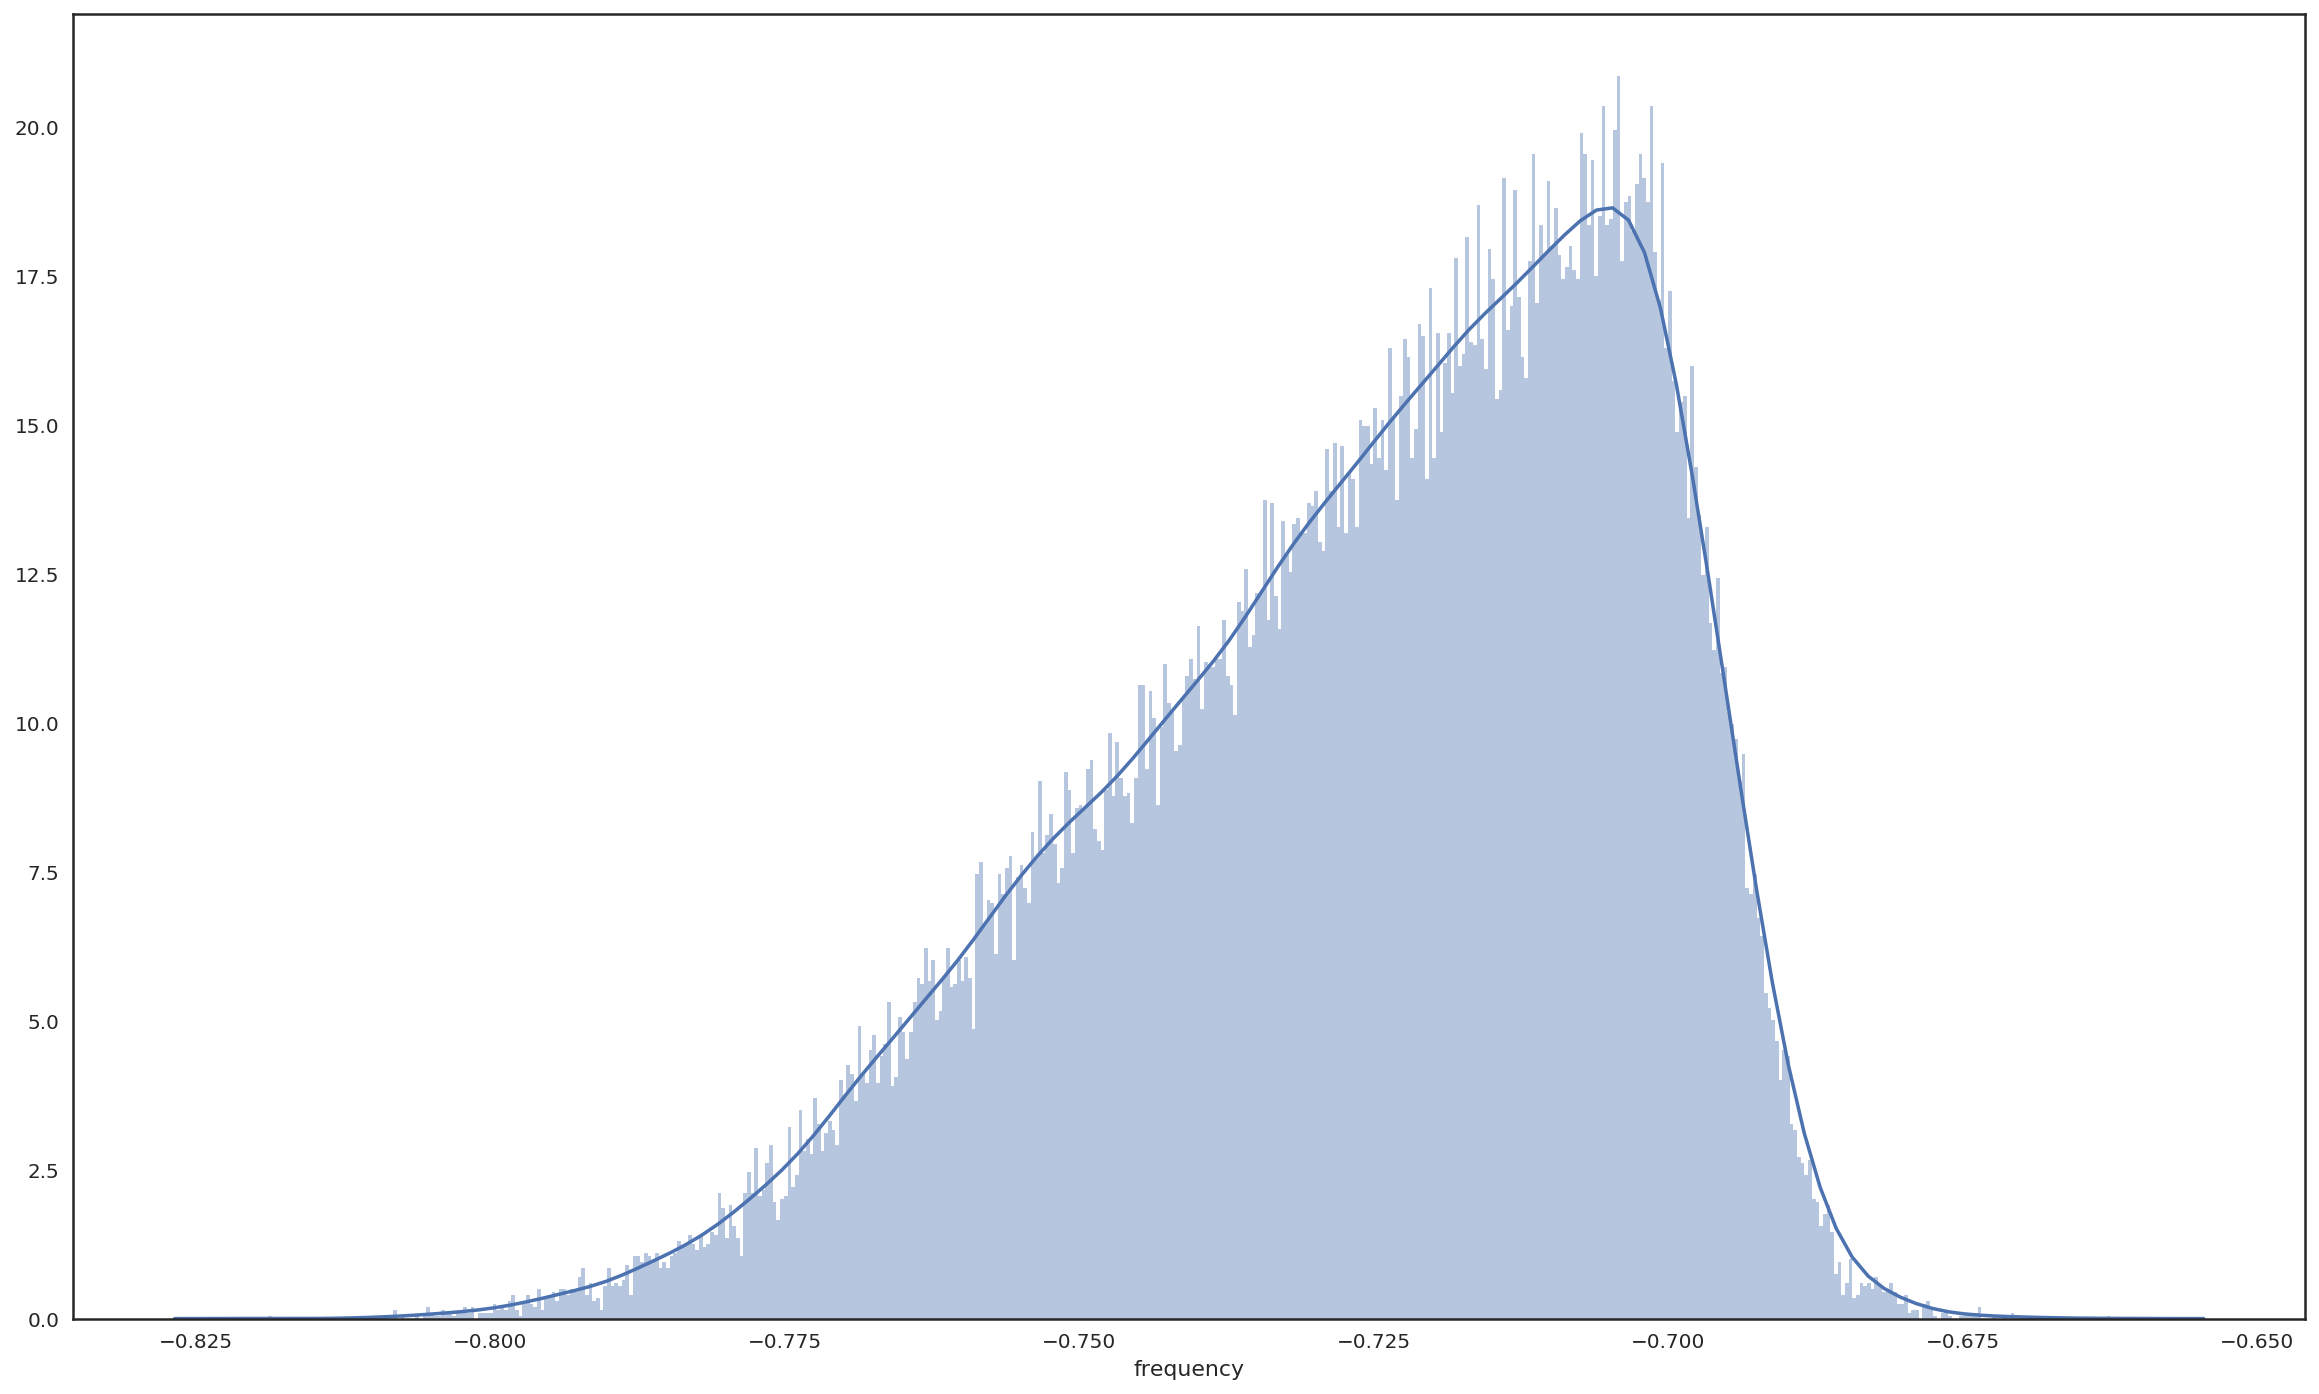

In [326]:
plt.figure(figsize=(20,12))
err=(y_pred-y)/y
sns.distplot(err,bins=500)
plt.show()